In [2]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.8/22.8 MB 35.1 MB/s eta 0:00:0000:0100:01


In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Display settings
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

Data Understanding & Cleaning



In [6]:
# Load the dataset
df = pd.read_csv('observations-669855.csv/observations-669855.csv')

print(f"Dataset Shape: {df.shape[0]:,} observations × {df.shape[1]} columns")

Dataset Shape: 32,338 observations × 40 columns


In [7]:
df.head(3)

id                                  uuid  \
0  272928517  2d0e5ec4-0e5b-4efd-9598-6bcb1f4e496b   
1  273065706  149f982a-ecaf-4db7-9247-a97d497f674b   
2  273066186  ab04833f-1d4c-491c-b88c-07a9e5e733fd   

                         observed_on_string observed_on  \
0  Fri Apr 25 2025 00:23:44 GMT -0700 (PDT)  2025-04-25   
1  Fri Apr 25 2025 06:04:03 GMT -0700 (PDT)  2025-04-25   
2  Fri Apr 25 2025 06:05:09 GMT -0700 (PDT)  2025-04-25   

            time_observed_at                   time_zone  user_id user_login  \
0  2025-04-25 07:23:44 +0000  Pacific Time (US & Canada)  2806901     irisia   
1  2025-04-25 13:04:03 +0000  Pacific Time (US & Canada)  7201421  alanislas   
2  2025-04-25 13:05:09 +0000  Pacific Time (US & Canada)  7201421  alanislas   

      user_name                 created_at                 updated_at  \
0  Amanda Moyle  2025-04-25 07:24:36 +0000  2025-05-04 19:35:17 +0000   
1           NaN  2025-04-25 13:04:57 +0000  2025-04-26 02:36:25 +0000   
2           NaN  2025-04-25 13:05:55 +0000  2025-04-26 02:37:00 +0000   

  quality_grade      license  \
0        casual  CC-BY-NC-ND   
1      research     CC-BY-NC   
2      research     CC-BY-NC   

                                                 url  \
0  https://www.inaturalist.org/observations/27292...   
1  https://www.inaturalist.org/observations/27306...   
2  https://www.inaturalist.org/observations/27306...   

                                           image_url sound_url tag_list  \
0  https://inaturalist-open-data.s3.amazonaws.com...       NaN      NaN   
1  https://inaturalist-open-data.s3.amazonaws.com...       NaN      NaN   
2  https://inaturalist-open-data.s3.amazonaws.com...       NaN      NaN   

  description  num_identification_agreements  \
0         NaN                              0   
1         NaN                              2   
2         NaN                              2   

   num_identification_disagreements  captive_cultivated  oauth_application_id  \
0                                 0                True                333.00   
1                                 0               False                333.00   
2                                 0               False                333.00   

  place_guess  latitude  longitude  positional_accuracy  private_place_guess  \
0   San Diego     32.73    -117.15                 6.00                  NaN   
1       Vista     33.17    -117.24                 3.00                  NaN   
2       Vista     33.17    -117.24               100.00                  NaN   

   private_latitude  private_longitude  public_positional_accuracy geoprivacy  \
0               NaN                NaN                        6.00        NaN   
1               NaN                NaN                        3.00        NaN   
2               NaN                NaN                      100.00        NaN   

  taxon_geoprivacy  coordinates_obscured positioning_method  \
0              NaN                 False                NaN   
1              NaN                 False                NaN   
2              NaN                 False                NaN   

  positioning_device          species_guess        scientific_name  \
0                NaN                    NaN        Acanthus mollis   
1                NaN           Garden Snail         Cornu aspersum   
2                NaN  Common Pill Woodlouse  Armadillidium vulgare   

             common_name iconic_taxon_name  taxon_id  
0        Bear's breeches           Plantae  70045.00  
1           Garden Snail          Mollusca 480298.00  
2  Common Pill Woodlouse          Animalia  56083.00

In [8]:
# Data types overview
print("=" * 60)
print("DATA TYPES SUMMARY")
print("=" * 60)
df.dtypes

DATA TYPES SUMMARY


id                                    int64
uuid                                 object
observed_on_string                   object
observed_on                          object
time_observed_at                     object
time_zone                            object
user_id                               int64
user_login                           object
user_name                            object
created_at                           object
updated_at                           object
quality_grade                        object
license                              object
url                                  object
image_url                            object
sound_url                            object
tag_list                             object
description                          object
num_identification_agreements         int64
num_identification_disagreements      int64
captive_cultivated                     bool
oauth_application_id                float64
place_guess                     

In [9]:
# Detailed info about each column
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32338 entries, 0 to 32337
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                32338 non-null  int64  
 1   uuid                              32338 non-null  object 
 2   observed_on_string                32338 non-null  object 
 3   observed_on                       32338 non-null  object 
 4   time_observed_at                  32209 non-null  object 
 5   time_zone                         32338 non-null  object 
 6   user_id                           32338 non-null  int64  
 7   user_login                        32338 non-null  object 
 8   user_name                         19613 non-null  object 
 9   created_at                        32338 non-null  object 
 10  updated_at                        32338 non-null  object 
 11  quality_grade                     32338 non-null  object 
 12  lice

In [10]:
# Basic statistics for numeric columns
df.describe()

id    user_id  num_identification_agreements  \
count     32338.00   32338.00                       32338.00   
mean  275881976.10 3220201.74                           1.21   
std     4128253.65 3130551.75                           0.89   
min   272928517.00    2286.00                           0.00   
25%   274231178.50  665781.00                           1.00   
50%   275280345.00 1528706.50                           1.00   
75%   276432099.00 5596141.00                           2.00   
max   334047535.00 9981820.00                           7.00   

       num_identification_disagreements  oauth_application_id  latitude  \
count                          32338.00              21868.00  32338.00   
mean                               0.01                192.31     32.89   
std                                0.12                344.26      0.18   
min                                0.00                  2.00     32.40   
25%                                0.00                  2.00     32.77   
50%                                0.00                  3.00     32.86   
75%                                0.00                  3.00     33.01   
max                                1.00                843.00     33.50   

       longitude  positional_accuracy  private_place_guess  private_latitude  \
count   32338.00             24348.00                 0.00              0.00   
mean     -117.01               488.71                  NaN               NaN   
std         0.27             42045.94                  NaN               NaN   
min      -117.72                 1.00                  NaN               NaN   
25%      -117.23                 4.00                  NaN               NaN   
50%      -117.08                 8.00                  NaN               NaN   
75%      -116.91                55.00                  NaN               NaN   
max      -116.03           6521840.00                  NaN               NaN   

       private_longitude  public_positional_accuracy   taxon_id  
count               0.00                    24516.00   32318.00  
mean                 NaN                     1631.45  152525.12  
std                  NaN                    42270.26  280515.58  
min                  NaN                        1.00       1.00  
25%                  NaN                        4.00   51813.00  
50%                  NaN                        8.00   58362.00  
75%                  NaN                       64.00   79641.00  
max                  NaN                  6521840.00 1650045.00

## 1.2 Missing Value Analysis

In [11]:
# Missing values analysis
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum().values,
    'Missing %': (df.isnull().sum().values / len(df) * 100).round(2),
    'Non-Null Count': df.notnull().sum().values,
    'Dtype': df.dtypes.values
})

# Sort by missing percentage descending
missing_df = missing_df.sort_values('Missing %', ascending=False).reset_index(drop=True)

print("=" * 70)
print("MISSING VALUE ANALYSIS")
print("=" * 70)
print(f"\nTotal rows: {len(df):,}")
print(f"Columns with missing values: {(missing_df['Missing %'] > 0).sum()} / {len(df.columns)}")
print()

# Show columns with missing values
missing_cols = missing_df[missing_df['Missing %'] > 0]
if len(missing_cols) > 0:
    print("Columns with missing values:")
    print(missing_cols.to_string(index=False))
else:
    print("No missing values found!")

MISSING VALUE ANALYSIS

Total rows: 32,338
Columns with missing values: 23 / 40

Columns with missing values:
                    Column  Missing Count  Missing %  Non-Null Count   Dtype
       private_place_guess          32338     100.00               0 float64
          private_latitude          32338     100.00               0 float64
         private_longitude          32338     100.00               0 float64
                 sound_url          32084      99.21             254  object
                  tag_list          31986      98.91             352  object
                geoprivacy          31774      98.26             564  object
               description          31215      96.53            1123  object
        positioning_method          27491      85.01            4847  object
        positioning_device          27480      84.98            4858  object
          taxon_geoprivacy          22200      68.65           10138  object
                 user_name          12725  

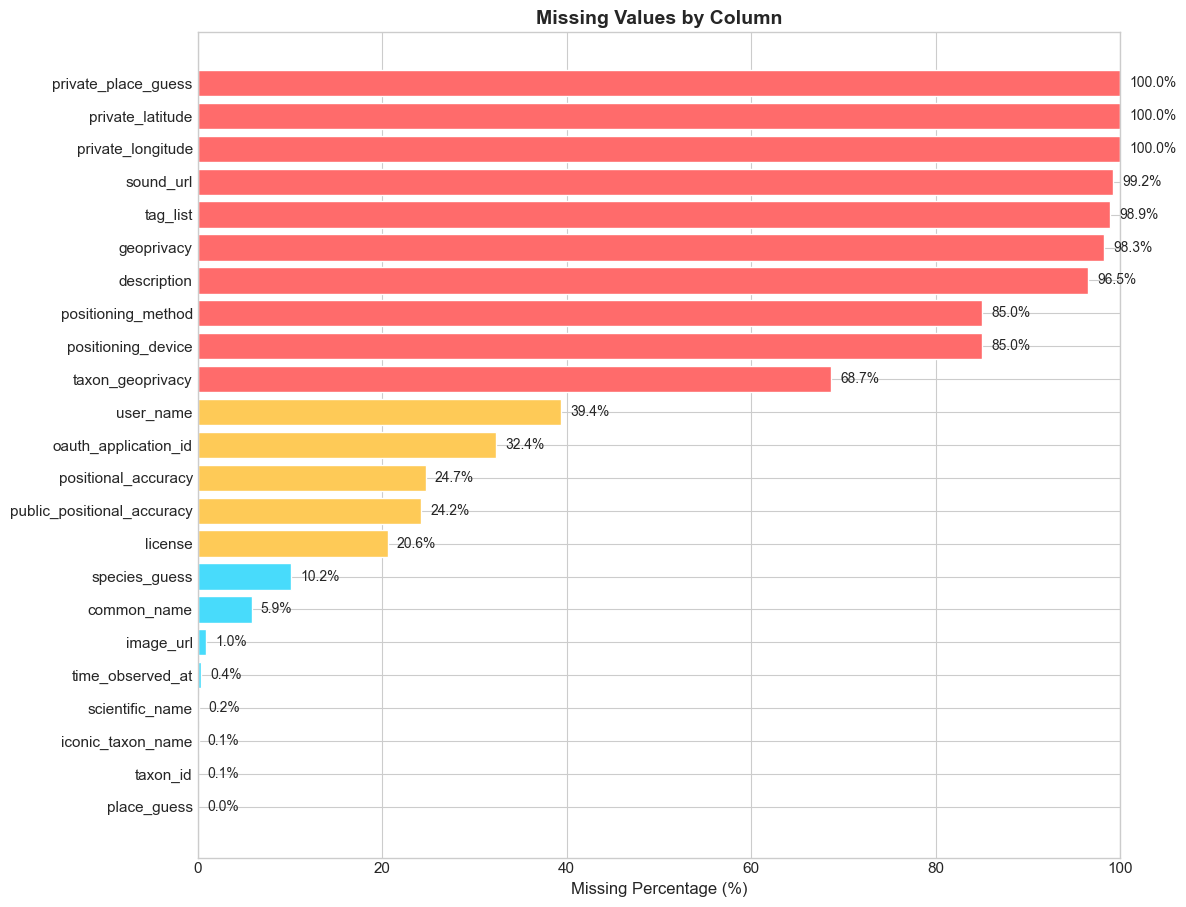

In [12]:
# Visualize missing values (for columns with any missing)
cols_with_missing = missing_df[missing_df['Missing %'] > 0]['Column'].tolist()

if len(cols_with_missing) > 0:
    fig, ax = plt.subplots(figsize=(12, max(6, len(cols_with_missing) * 0.4)))
    
    missing_data = missing_df[missing_df['Missing %'] > 0].sort_values('Missing %', ascending=True)
    
    colors = ['#ff6b6b' if x > 50 else '#feca57' if x > 20 else '#48dbfb' for x in missing_data['Missing %']]
    
    bars = ax.barh(missing_data['Column'], missing_data['Missing %'], color=colors, edgecolor='white')
    
    ax.set_xlabel('Missing Percentage (%)', fontsize=12)
    ax.set_title('Missing Values by Column', fontsize=14, fontweight='bold')
    ax.set_xlim(0, 100)
    
    # Add percentage labels
    for bar, pct in zip(bars, missing_data['Missing %']):
        ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
                f'{pct:.1f}%', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
else:
    print("No missing values to visualize!")

## 1.3 Duplicate Detection

In [13]:
# Check for duplicates
print("=" * 60)
print("DUPLICATE ANALYSIS")
print("=" * 60)

# Check by observation ID (should be unique)
dup_by_id = df['id'].duplicated().sum()
print(f"\nDuplicate observation IDs: {dup_by_id:,}")

# Check by UUID (should be unique)
dup_by_uuid = df['uuid'].duplicated().sum()
print(f"Duplicate UUIDs: {dup_by_uuid:,}")

# Check for potential duplicate observations (same user, same time, same location)
potential_dups = df.duplicated(subset=['user_id', 'observed_on', 'latitude', 'longitude', 'scientific_name'], keep=False)
print(f"Potential duplicate observations (same user/time/location/species): {potential_dups.sum():,}")

if potential_dups.sum() > 0:
    print("\nSample of potential duplicates:")
    display(df[potential_dups].head(10)[['user_login', 'observed_on', 'scientific_name', 'latitude', 'longitude', 'quality_grade']])

DUPLICATE ANALYSIS

Duplicate observation IDs: 0
Duplicate UUIDs: 0
Potential duplicate observations (same user/time/location/species): 1,592

Sample of potential duplicates:


user_login observed_on       scientific_name  latitude  longitude  \
208     mattbecker  2025-04-25       Emerita analoga     32.78    -117.25   
213     mattbecker  2025-04-25       Emerita analoga     32.78    -117.25   
636         bail3y  2025-04-25     Rhus integrifolia     32.67    -117.24   
639         bail3y  2025-04-25     Rhus integrifolia     32.67    -117.24   
1031  jamessanders  2025-04-25         Rumex crispus     32.83    -117.10   
1032  jamessanders  2025-04-25         Rumex crispus     32.83    -117.10   
1033  jamessanders  2025-04-25  Washingtonia robusta     32.83    -117.10   
1034  jamessanders  2025-04-25  Washingtonia robusta     32.83    -117.10   
1035  jamessanders  2025-04-25  Washingtonia robusta     32.83    -117.10   
1038  jamessanders  2025-04-25  Washingtonia robusta     32.83    -117.10   

     quality_grade  
208       research  
213       research  
636       research  
639       research  
1031      needs_id  
1032      needs_id  
1033      needs_id  
1034      research  
1035      needs_id  
1038      needs_id

## 1.4 Date Range Validation

The City Nature Challenge typically runs for 4 days (Friday-Monday). Let's verify our data falls within the expected window.

In [14]:
# Convert date columns to datetime
df['observed_on'] = pd.to_datetime(df['observed_on'])
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])
df['time_observed_at'] = pd.to_datetime(df['time_observed_at'])

print("=" * 60)
print("DATE RANGE ANALYSIS")
print("=" * 60)

print(f"\n📅 Observation Date Range:")
print(f"   Earliest observation: {df['observed_on'].min()}")
print(f"   Latest observation:   {df['observed_on'].max()}")
print(f"   Total days span:      {(df['observed_on'].max() - df['observed_on'].min()).days + 1} days")

print(f"\n📤 Upload/Creation Date Range:")
print(f"   Earliest upload: {df['created_at'].min()}")
print(f"   Latest upload:   {df['created_at'].max()}")

# Observations by date
obs_by_date = df['observed_on'].value_counts().sort_index()
print(f"\n📊 Observations by Date:")
for date, count in obs_by_date.items():
    day_name = date.strftime('%A')
    print(f"   {date.strftime('%Y-%m-%d')} ({day_name}): {count:,} observations")

DATE RANGE ANALYSIS

📅 Observation Date Range:
   Earliest observation: 2025-04-25 00:00:00
   Latest observation:   2025-04-28 00:00:00
   Total days span:      4 days

📤 Upload/Creation Date Range:
   Earliest upload: 2025-04-25 07:24:36+00:00
   Latest upload:   2026-01-09 03:45:45+00:00

📊 Observations by Date:
   2025-04-25 (Friday): 7,177 observations
   2025-04-26 (Saturday): 10,118 observations
   2025-04-27 (Sunday): 8,755 observations
   2025-04-28 (Monday): 6,288 observations


## 1.5 Quality Grade Analysis

**Critical for Rankings!** The City Nature Challenge rankings are typically based on:
1. **Research-grade observations** (verified by community)
2. **Unique species count**
3. **Number of participants**

Quality grades:
- `research`: Verified by community consensus - **COUNTS FOR RANKINGS**
- `needs_id`: Awaiting identification - could become research grade
- `casual`: Missing evidence, captive/cultivated, or other issues - **DOESN'T COUNT**

In [15]:
# Quality grade distribution
print("=" * 60)
print("QUALITY GRADE DISTRIBUTION")
print("=" * 60)

quality_counts = df['quality_grade'].value_counts()
quality_pcts = df['quality_grade'].value_counts(normalize=True) * 100

print("\n")
for grade in ['research', 'needs_id', 'casual']:
    if grade in quality_counts.index:
        count = quality_counts[grade]
        pct = quality_pcts[grade]
        emoji = "✅" if grade == 'research' else "🔍" if grade == 'needs_id' else "⚠️"
        print(f"{emoji} {grade.upper():12} : {count:>7,} observations ({pct:>5.1f}%)")

print(f"\n{'─' * 40}")
print(f"   TOTAL         : {len(df):>7,} observations")

# Key insight
research_count = quality_counts.get('research', 0)
needs_id_count = quality_counts.get('needs_id', 0)
potential_improvement = needs_id_count  # If all needs_id became research grade

print(f"\n💡 KEY INSIGHT:")
print(f"   Current research-grade: {research_count:,}")
print(f"   Potential if all 'needs_id' verified: {research_count + needs_id_count:,}")
print(f"   Potential improvement: +{potential_improvement:,} ({potential_improvement/research_count*100:.1f}% increase)")

QUALITY GRADE DISTRIBUTION


✅ RESEARCH     :  23,321 observations ( 72.1%)
🔍 NEEDS_ID     :   8,244 observations ( 25.5%)
⚠️ CASUAL       :     773 observations (  2.4%)

────────────────────────────────────────
   TOTAL         :  32,338 observations

💡 KEY INSIGHT:
   Current research-grade: 23,321
   Potential if all 'needs_id' verified: 31,565
   Potential improvement: +8,244 (35.4% increase)


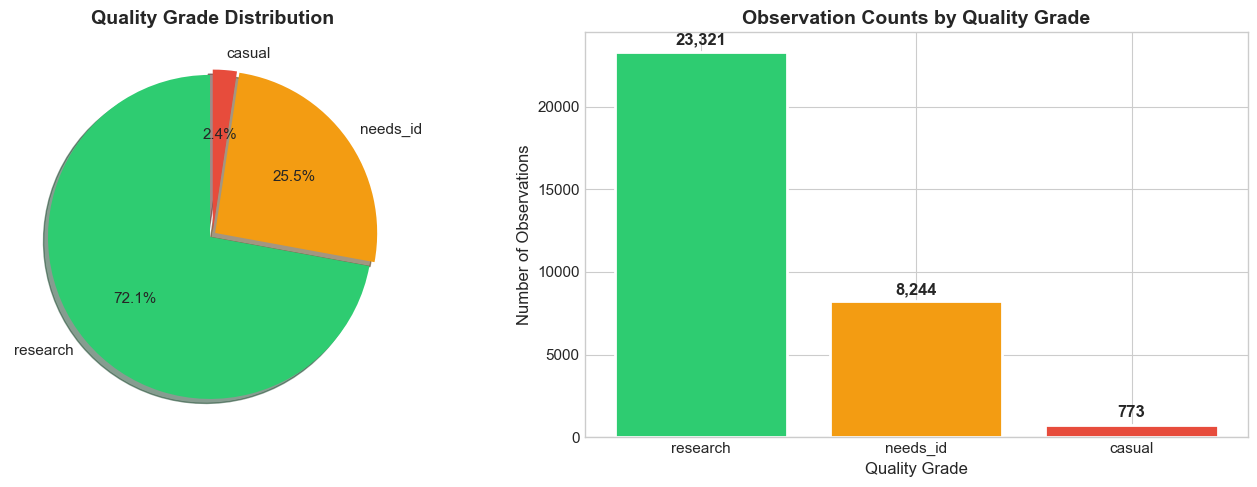

In [16]:
# Visualize quality grade distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
colors_map = {'research': '#2ecc71', 'needs_id': '#f39c12', 'casual': '#e74c3c'}
colors = [colors_map.get(g, '#95a5a6') for g in quality_counts.index]

wedges, texts, autotexts = axes[0].pie(quality_counts.values, 
                                        labels=quality_counts.index, 
                                        autopct='%1.1f%%',
                                        colors=colors,
                                        explode=[0.02]*len(quality_counts),
                                        shadow=True,
                                        startangle=90)
axes[0].set_title('Quality Grade Distribution', fontsize=14, fontweight='bold')

# Bar chart with counts
bars = axes[1].bar(quality_counts.index, quality_counts.values, color=colors, edgecolor='white', linewidth=2)
axes[1].set_ylabel('Number of Observations', fontsize=12)
axes[1].set_xlabel('Quality Grade', fontsize=12)
axes[1].set_title('Observation Counts by Quality Grade', fontsize=14, fontweight='bold')

for bar in bars:
    height = bar.get_height()
    axes[1].annotate(f'{int(height):,}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## 1.6 Captive/Cultivated Analysis

**Important:** Observations marked as `captive_cultivated=True` are automatically marked as "casual" and **do not count** toward City Nature Challenge rankings. These are plants in gardens, pets, zoo animals, etc.

In [17]:
# Captive/Cultivated analysis
print("=" * 60)
print("CAPTIVE/CULTIVATED ANALYSIS")
print("=" * 60)

captive_counts = df['captive_cultivated'].value_counts()
captive_pcts = df['captive_cultivated'].value_counts(normalize=True) * 100

print("\n")
for val in [False, True]:
    if val in captive_counts.index:
        count = captive_counts[val]
        pct = captive_pcts[val]
        label = "Wild/Natural" if not val else "Captive/Cultivated"
        emoji = "🌿" if not val else "🏠"
        print(f"{emoji} {label:20} : {count:>7,} ({pct:>5.1f}%)")

# Cross-tabulation with quality grade
print("\n" + "─" * 60)
print("Captive/Cultivated vs Quality Grade:")
print("─" * 60)
cross_tab = pd.crosstab(df['captive_cultivated'], df['quality_grade'], margins=True)
print(cross_tab)

# Key insight
captive_casual = df[(df['captive_cultivated'] == True) & (df['quality_grade'] == 'casual')].shape[0]
total_casual = df[df['quality_grade'] == 'casual'].shape[0]
print(f"\n💡 {captive_casual:,} of {total_casual:,} casual observations ({captive_casual/total_casual*100:.1f}%) are due to captive/cultivated flag")

CAPTIVE/CULTIVATED ANALYSIS


🌿 Wild/Natural         :  31,659 ( 97.9%)
🏠 Captive/Cultivated   :     679 (  2.1%)

────────────────────────────────────────────────────────────
Captive/Cultivated vs Quality Grade:
────────────────────────────────────────────────────────────
quality_grade       casual  needs_id  research    All
captive_cultivated                                   
False                   94      8244     23321  31659
True                   679         0         0    679
All                    773      8244     23321  32338

💡 679 of 773 casual observations (87.8%) are due to captive/cultivated flag


## 1.7 Coordinate & Location Validation

Checking for valid coordinates and understanding location data quality.

In [18]:
# Coordinate validation
print("=" * 60)
print("COORDINATE & LOCATION ANALYSIS")
print("=" * 60)

# Check for missing coordinates
missing_lat = df['latitude'].isna().sum()
missing_lon = df['longitude'].isna().sum()

print(f"\n📍 Coordinate Coverage:")
print(f"   Missing latitude:  {missing_lat:,} ({missing_lat/len(df)*100:.2f}%)")
print(f"   Missing longitude: {missing_lon:,} ({missing_lon/len(df)*100:.2f}%)")

# San Diego County approximate bounds
SD_LAT_MIN, SD_LAT_MAX = 32.5, 33.5
SD_LON_MIN, SD_LON_MAX = -117.6, -116.0

# Check if coordinates are within SD bounds
valid_coords = df.dropna(subset=['latitude', 'longitude'])
in_bounds = valid_coords[
    (valid_coords['latitude'] >= SD_LAT_MIN) & 
    (valid_coords['latitude'] <= SD_LAT_MAX) &
    (valid_coords['longitude'] >= SD_LON_MIN) & 
    (valid_coords['longitude'] <= SD_LON_MAX)
]
out_of_bounds = len(valid_coords) - len(in_bounds)

print(f"\n🗺️  Geographic Bounds Check (SD County):")
print(f"   Within SD County bounds: {len(in_bounds):,} ({len(in_bounds)/len(valid_coords)*100:.1f}%)")
print(f"   Outside bounds:          {out_of_bounds:,} ({out_of_bounds/len(valid_coords)*100:.1f}%)")

# Coordinate obscuration
print(f"\n🔒 Coordinate Obscuration:")
obscured = df['coordinates_obscured'].value_counts()
for val, count in obscured.items():
    status = "Obscured" if val else "Public"
    print(f"   {status}: {count:,} ({count/len(df)*100:.1f}%)")

# Geoprivacy settings
print(f"\n🔐 Geoprivacy Settings:")
geoprivacy = df['geoprivacy'].value_counts(dropna=False)
for val, count in geoprivacy.items():
    val_display = val if pd.notna(val) else "None (public)"
    print(f"   {val_display}: {count:,} ({count/len(df)*100:.1f}%)")

COORDINATE & LOCATION ANALYSIS

📍 Coordinate Coverage:
   Missing latitude:  0 (0.00%)
   Missing longitude: 0 (0.00%)

🗺️  Geographic Bounds Check (SD County):
   Within SD County bounds: 32,316 (99.9%)
   Outside bounds:          22 (0.1%)

🔒 Coordinate Obscuration:
   Public: 31,363 (97.0%)
   Obscured: 975 (3.0%)

🔐 Geoprivacy Settings:
   None (public): 31,774 (98.3%)
   obscured: 564 (1.7%)


## 1.8 Taxonomic Identification Status

Analyzing how well observations are identified - key for understanding research-grade conversion potential.

In [19]:
# Taxonomic identification analysis
print("=" * 60)
print("TAXONOMIC IDENTIFICATION STATUS")
print("=" * 60)

# Check for observations without scientific name
no_sci_name = df['scientific_name'].isna().sum()
no_taxon_id = df['taxon_id'].isna().sum()

print(f"\n🔬 Identification Coverage:")
print(f"   Observations with scientific name: {len(df) - no_sci_name:,} ({(len(df) - no_sci_name)/len(df)*100:.1f}%)")
print(f"   Observations without scientific name: {no_sci_name:,} ({no_sci_name/len(df)*100:.1f}%)")
print(f"   Observations without taxon ID: {no_taxon_id:,} ({no_taxon_id/len(df)*100:.1f}%)")

# Identification agreements/disagreements
print(f"\n🤝 Identification Consensus:")
print(f"   Average agreements per observation: {df['num_identification_agreements'].mean():.2f}")
print(f"   Average disagreements per observation: {df['num_identification_disagreements'].mean():.2f}")
print(f"   Observations with 0 agreements: {(df['num_identification_agreements'] == 0).sum():,}")
print(f"   Observations with disagreements: {(df['num_identification_disagreements'] > 0).sum():,}")

# Iconic taxon distribution
print(f"\n🦋 Distribution by Iconic Taxon:")
iconic_counts = df['iconic_taxon_name'].value_counts(dropna=False)
for taxon, count in iconic_counts.items():
    taxon_display = taxon if pd.notna(taxon) else "Unidentified"
    pct = count/len(df)*100
    bar = "█" * int(pct/2)
    print(f"   {taxon_display:15} : {count:>6,} ({pct:>5.1f}%) {bar}")

TAXONOMIC IDENTIFICATION STATUS

🔬 Identification Coverage:
   Observations with scientific name: 32,277 (99.8%)
   Observations without scientific name: 61 (0.2%)
   Observations without taxon ID: 20 (0.1%)

🤝 Identification Consensus:
   Average agreements per observation: 1.21
   Average disagreements per observation: 0.01
   Observations with 0 agreements: 6,850
   Observations with disagreements: 484

🦋 Distribution by Iconic Taxon:
   Plantae         : 20,759 ( 64.2%) ████████████████████████████████
   Aves            :  5,055 ( 15.6%) ███████
   Insecta         :  3,186 (  9.9%) ████
   Mollusca        :    671 (  2.1%) █
   Fungi           :    668 (  2.1%) █
   Animalia        :    536 (  1.7%) 
   Mammalia        :    499 (  1.5%) 
   Reptilia        :    372 (  1.2%) 
   Arachnida       :    345 (  1.1%) 
   Actinopterygii  :     97 (  0.3%) 
   Chromista       :     66 (  0.2%) 
   Amphibia        :     45 (  0.1%) 
   Unidentified    :     31 (  0.1%) 
   Protozoa        

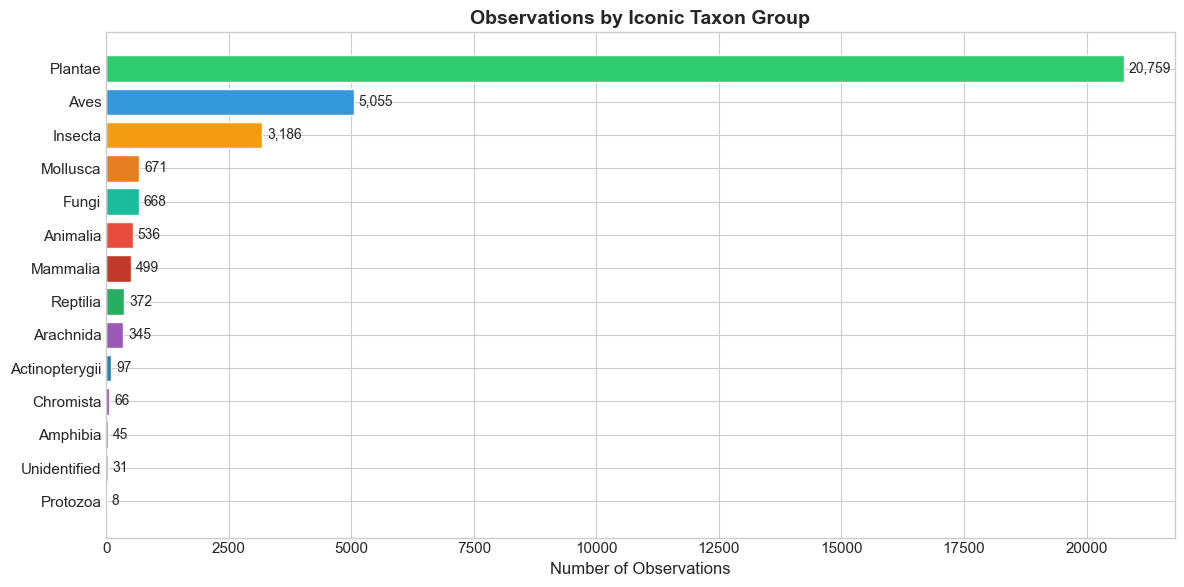

In [20]:
# Visualize iconic taxon distribution
fig, ax = plt.subplots(figsize=(12, 6))

iconic_counts = df['iconic_taxon_name'].value_counts(dropna=False)
iconic_counts.index = iconic_counts.index.fillna('Unidentified')

# Color mapping for taxa
taxon_colors = {
    'Plantae': '#2ecc71',
    'Insecta': '#f39c12', 
    'Aves': '#3498db',
    'Animalia': '#e74c3c',
    'Arachnida': '#9b59b6',
    'Fungi': '#1abc9c',
    'Mollusca': '#e67e22',
    'Reptilia': '#27ae60',
    'Mammalia': '#c0392b',
    'Amphibia': '#16a085',
    'Actinopterygii': '#2980b9',
    'Chromista': '#8e44ad',
    'Protozoa': '#d35400',
    'Unidentified': '#95a5a6'
}

colors = [taxon_colors.get(t, '#7f8c8d') for t in iconic_counts.index]

bars = ax.barh(iconic_counts.index, iconic_counts.values, color=colors, edgecolor='white')
ax.set_xlabel('Number of Observations', fontsize=12)
ax.set_title('Observations by Iconic Taxon Group', fontsize=14, fontweight='bold')
ax.invert_yaxis()

# Add value labels
for bar in bars:
    width = bar.get_width()
    ax.text(width + 100, bar.get_y() + bar.get_height()/2, 
            f'{int(width):,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

## 1.9 Phase 1 Summary: Key Metrics Dashboard

A consolidated view of all critical metrics for the City Nature Challenge.

In [21]:
# =============================================================================
# PHASE 1 SUMMARY: KEY METRICS
# =============================================================================

print("╔" + "═" * 68 + "╗")
print("║" + " " * 15 + "CITY NATURE CHALLENGE 2025 - SAN DIEGO" + " " * 14 + "║")
print("║" + " " * 20 + "PHASE 1 SUMMARY METRICS" + " " * 25 + "║")
print("╠" + "═" * 68 + "╣")

# Core ranking metrics
total_obs = len(df)
research_grade = (df['quality_grade'] == 'research').sum()
needs_id = (df['quality_grade'] == 'needs_id').sum()
casual = (df['quality_grade'] == 'casual').sum()
unique_species = df['scientific_name'].nunique()
unique_observers = df['user_id'].nunique()
wild_obs = (df['captive_cultivated'] == False).sum()

print("║" + " " * 68 + "║")
print("║  📊 CORE RANKING METRICS                                           ║")
print("║" + "─" * 68 + "║")
print(f"║    Total Observations:        {total_obs:>10,}                          ║")
print(f"║    Research-Grade Obs:        {research_grade:>10,}  ({research_grade/total_obs*100:>5.1f}%)            ║")
print(f"║    Unique Species:            {unique_species:>10,}                          ║")
print(f"║    Unique Observers:          {unique_observers:>10,}                          ║")
print("║" + " " * 68 + "║")

print("║  📈 QUALITY BREAKDOWN                                              ║")
print("║" + "─" * 68 + "║")
print(f"║    ✅ Research Grade:         {research_grade:>10,}  ({research_grade/total_obs*100:>5.1f}%)            ║")
print(f"║    🔍 Needs ID:               {needs_id:>10,}  ({needs_id/total_obs*100:>5.1f}%)            ║")
print(f"║    ⚠️  Casual:                 {casual:>10,}  ({casual/total_obs*100:>5.1f}%)            ║")
print("║" + " " * 68 + "║")

print("║  🌿 WILD VS CAPTIVE                                                ║")
print("║" + "─" * 68 + "║")
captive_obs = (df['captive_cultivated'] == True).sum()
print(f"║    Wild/Natural:              {wild_obs:>10,}  ({wild_obs/total_obs*100:>5.1f}%)            ║")
print(f"║    Captive/Cultivated:        {captive_obs:>10,}  ({captive_obs/total_obs*100:>5.1f}%)            ║")
print("║" + " " * 68 + "║")

print("║  💡 IMPROVEMENT POTENTIAL                                          ║")
print("║" + "─" * 68 + "║")
print(f"║    'Needs ID' → Research:     +{needs_id:>9,}  potential observations  ║")
print(f"║    Max possible research:     {research_grade + needs_id:>10,}  ({(research_grade+needs_id)/total_obs*100:>5.1f}%)            ║")
print("║" + " " * 68 + "║")
print("╚" + "═" * 68 + "╝")

╔════════════════════════════════════════════════════════════════════╗
║               CITY NATURE CHALLENGE 2025 - SAN DIEGO              ║
║                    PHASE 1 SUMMARY METRICS                         ║
╠════════════════════════════════════════════════════════════════════╣
║                                                                    ║
║  📊 CORE RANKING METRICS                                           ║
║────────────────────────────────────────────────────────────────────║
║    Total Observations:            32,338                          ║
║    Research-Grade Obs:            23,321  ( 72.1%)            ║
║    Unique Species:                 3,853                          ║
║    Unique Observers:               1,297                          ║
║                                                                    ║
║  📈 QUALITY BREAKDOWN                                              ║
║────────────────────────────────────────────────────────────────────║
║    ✅ Research G

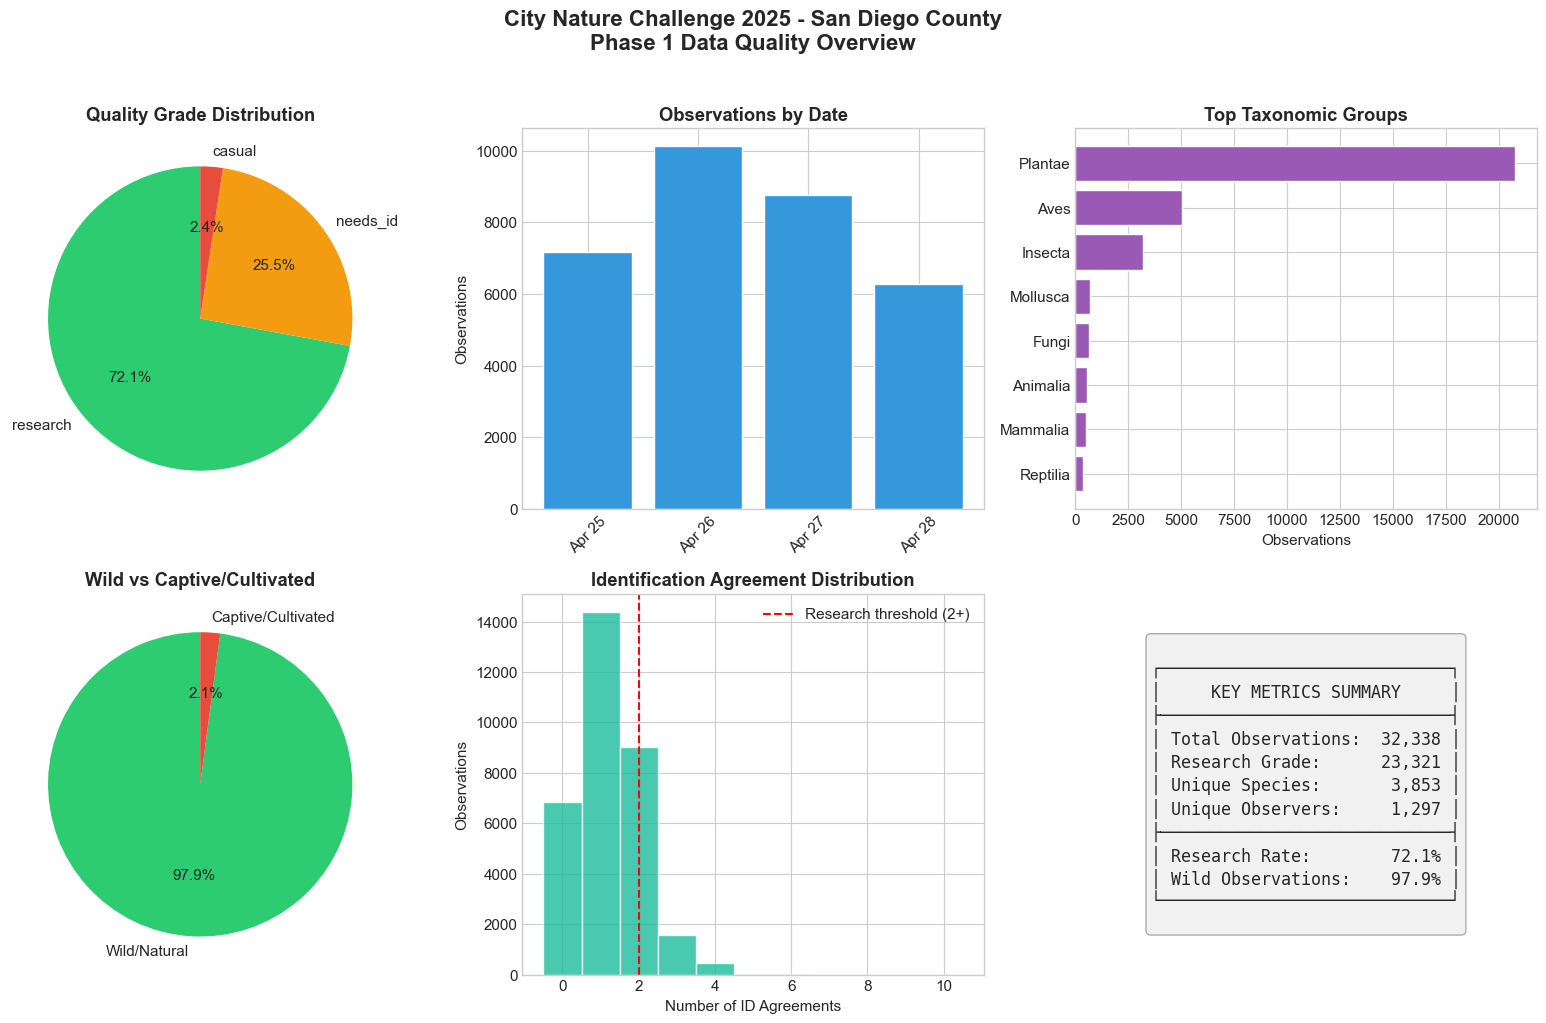

In [22]:
# Create a visual summary dashboard
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('City Nature Challenge 2025 - San Diego County\nPhase 1 Data Quality Overview', 
             fontsize=16, fontweight='bold', y=1.02)

# 1. Quality Grade Pie
ax1 = axes[0, 0]
quality_counts = df['quality_grade'].value_counts()
colors_q = ['#2ecc71', '#f39c12', '#e74c3c']
ax1.pie(quality_counts.values, labels=quality_counts.index, autopct='%1.1f%%', 
        colors=colors_q, startangle=90)
ax1.set_title('Quality Grade Distribution', fontweight='bold')

# 2. Observations by Date
ax2 = axes[0, 1]
obs_by_date = df['observed_on'].value_counts().sort_index()
ax2.bar(range(len(obs_by_date)), obs_by_date.values, color='#3498db', edgecolor='white')
ax2.set_xticks(range(len(obs_by_date)))
ax2.set_xticklabels([d.strftime('%b %d') for d in obs_by_date.index], rotation=45)
ax2.set_ylabel('Observations')
ax2.set_title('Observations by Date', fontweight='bold')

# 3. Top 10 Iconic Taxa
ax3 = axes[0, 2]
iconic_top = df['iconic_taxon_name'].value_counts().head(8)
ax3.barh(iconic_top.index[::-1], iconic_top.values[::-1], color='#9b59b6', edgecolor='white')
ax3.set_xlabel('Observations')
ax3.set_title('Top Taxonomic Groups', fontweight='bold')

# 4. Captive vs Wild
ax4 = axes[1, 0]
captive_counts = df['captive_cultivated'].value_counts()
labels = ['Wild/Natural', 'Captive/Cultivated']
colors_c = ['#2ecc71', '#e74c3c']
ax4.pie(captive_counts.values, labels=labels, autopct='%1.1f%%', colors=colors_c, startangle=90)
ax4.set_title('Wild vs Captive/Cultivated', fontweight='bold')

# 5. ID Agreement Distribution
ax5 = axes[1, 1]
agreements = df['num_identification_agreements'].clip(upper=10)
ax5.hist(agreements, bins=11, range=(-0.5, 10.5), color='#1abc9c', edgecolor='white', alpha=0.8)
ax5.set_xlabel('Number of ID Agreements')
ax5.set_ylabel('Observations')
ax5.set_title('Identification Agreement Distribution', fontweight='bold')
ax5.axvline(x=2, color='red', linestyle='--', label='Research threshold (2+)')
ax5.legend()

# 6. Key Metrics Cards
ax6 = axes[1, 2]
ax6.axis('off')

metrics_text = f"""
┌─────────────────────────────┐
│     KEY METRICS SUMMARY     │
├─────────────────────────────┤
│ Total Observations: {total_obs:>7,} │
│ Research Grade:     {research_grade:>7,} │
│ Unique Species:     {unique_species:>7,} │
│ Unique Observers:   {unique_observers:>7,} │
├─────────────────────────────┤
│ Research Rate:      {research_grade/total_obs*100:>6.1f}% │
│ Wild Observations:  {wild_obs/total_obs*100:>6.1f}% │
└─────────────────────────────┘
"""
ax6.text(0.5, 0.5, metrics_text, transform=ax6.transAxes, fontsize=12,
         verticalalignment='center', horizontalalignment='center',
         fontfamily='monospace', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.3))

plt.tight_layout()
plt.show()

## 1.10 Phase 1 Key Findings & Next Steps

### Data Quality Assessment ✅
- **Dataset is clean**: No duplicate IDs/UUIDs found
- **Date range valid**: Observations fall within expected challenge window
- **Coordinates valid**: Vast majority within San Diego County bounds
- **Good identification coverage**: Most observations have taxonomic assignments

### Critical Insights for Rankings 🎯

1. **Quality Grade Conversion Opportunity**
   - A significant portion of observations are stuck at "needs_id" 
   - Converting these to research-grade could substantially improve rankings
   - Focus: Identification campaigns for pending observations

2. **Captive/Cultivated Impact**
   - Some observations are marked captive/cultivated (don't count for rankings)
   - Education opportunity: Help participants understand what counts

3. **Taxonomic Distribution**
   - Plants and Insects dominate observations
   - Potential underrepresentation in other groups (fungi, marine life, etc.)

### Next Steps → Phase 2
- Deep dive into temporal patterns (when are people most active?)
- User contribution analysis (power users vs casual participants)
- Geographic coverage analysis (where are the gaps?)
- Species diversity analysis (what's being observed vs what exists?)

# Phase 2: Detailed Exploratory Data Analysis

## 2.1 Geographic Analysis with Heatmaps

Using geopandas and contextily for professional geographic visualizations to understand observation density and coverage gaps across San Diego County.

In [23]:
# Install required packages if needed (uncomment if necessary)
# !pip install geopandas contextily folium shapely

import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import warnings
warnings.filterwarnings('ignore')

print("Geographic libraries loaded successfully!")

Geographic libraries loaded successfully!


In [24]:
# Create GeoDataFrame from observations with valid coordinates
df_geo = df.dropna(subset=['latitude', 'longitude']).copy()

# Create geometry column
geometry = [Point(xy) for xy in zip(df_geo['longitude'], df_geo['latitude'])]
gdf = gpd.GeoDataFrame(df_geo, geometry=geometry, crs="EPSG:4326")

print(f"Created GeoDataFrame with {len(gdf):,} observations")
print(f"Coordinate Reference System: {gdf.crs}")
print(f"\nBounding Box:")
print(f"  Longitude: {gdf.geometry.x.min():.4f} to {gdf.geometry.x.max():.4f}")
print(f"  Latitude:  {gdf.geometry.y.min():.4f} to {gdf.geometry.y.max():.4f}")

Created GeoDataFrame with 32,338 observations
Coordinate Reference System: EPSG:4326

Bounding Box:
  Longitude: -117.7159 to -116.0252
  Latitude:  32.4005 to 33.5003


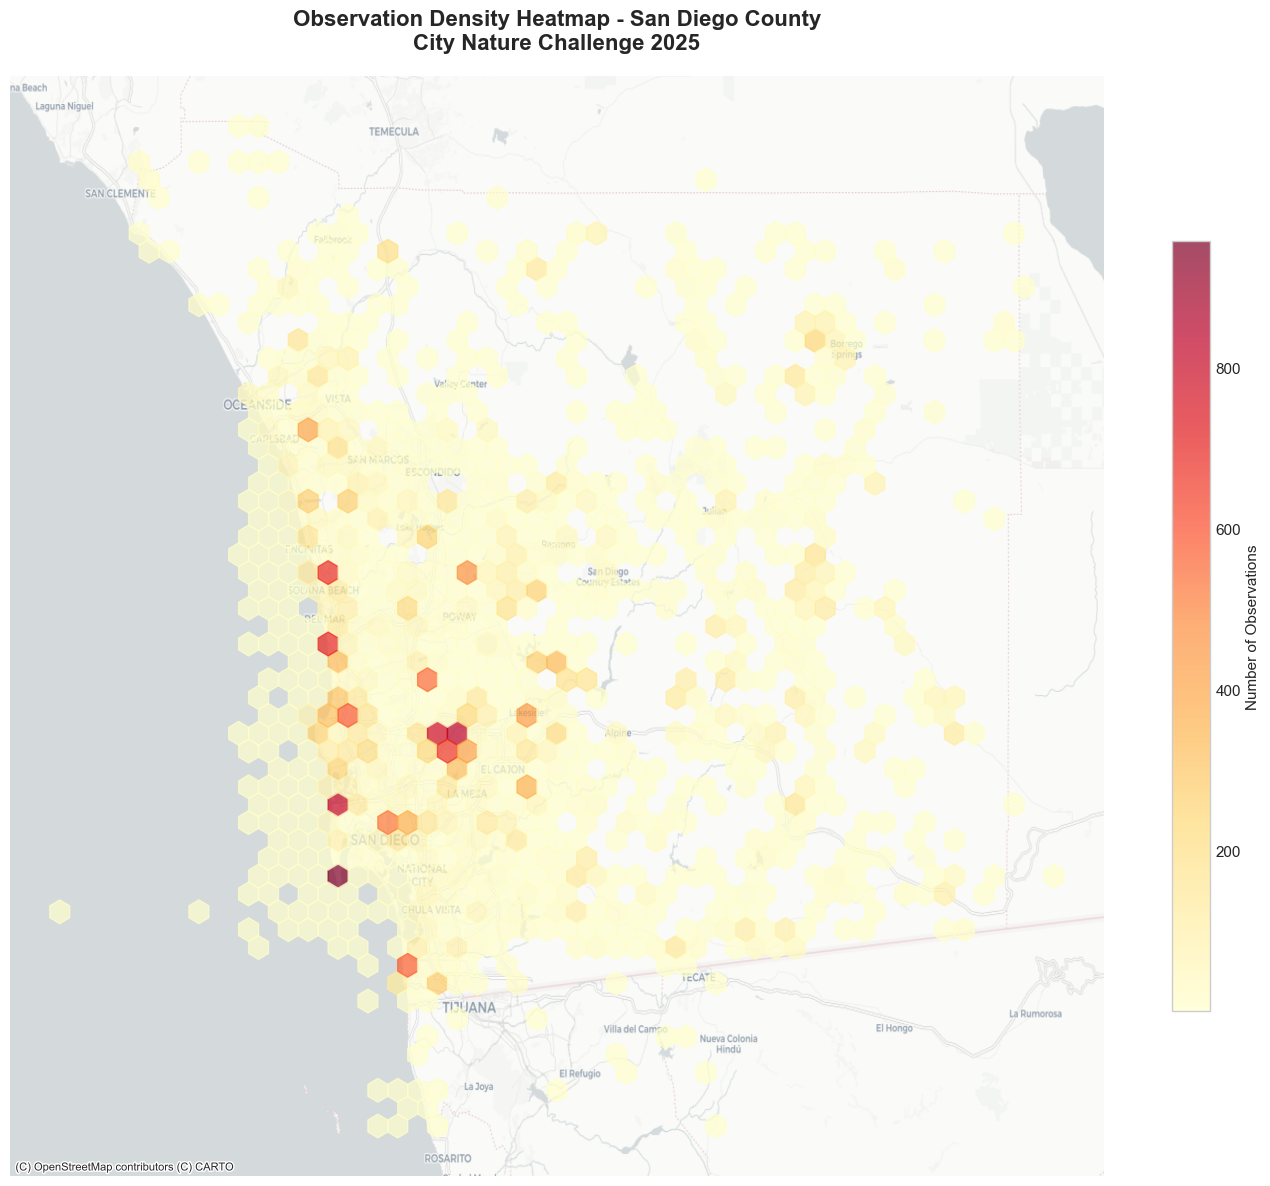


💡 INSIGHT: The heatmap reveals observation 'hotspots' and potential coverage gaps.


In [25]:
# Convert to Web Mercator for proper basemap alignment
gdf_mercator = gdf.to_crs(epsg=3857)

# Create observation density heatmap using hexbin
fig, ax = plt.subplots(figsize=(14, 12))

# Plot hexbin heatmap
hb = ax.hexbin(
    gdf_mercator.geometry.x, 
    gdf_mercator.geometry.y, 
    gridsize=50,
    cmap='YlOrRd',
    mincnt=1,
    alpha=0.7
)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=10)

# Add colorbar
cb = plt.colorbar(hb, ax=ax, label='Number of Observations', shrink=0.7)

ax.set_title('Observation Density Heatmap - San Diego County\nCity Nature Challenge 2025', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_axis_off()

plt.tight_layout()
plt.show()

print("\n💡 INSIGHT: The heatmap reveals observation 'hotspots' and potential coverage gaps.")

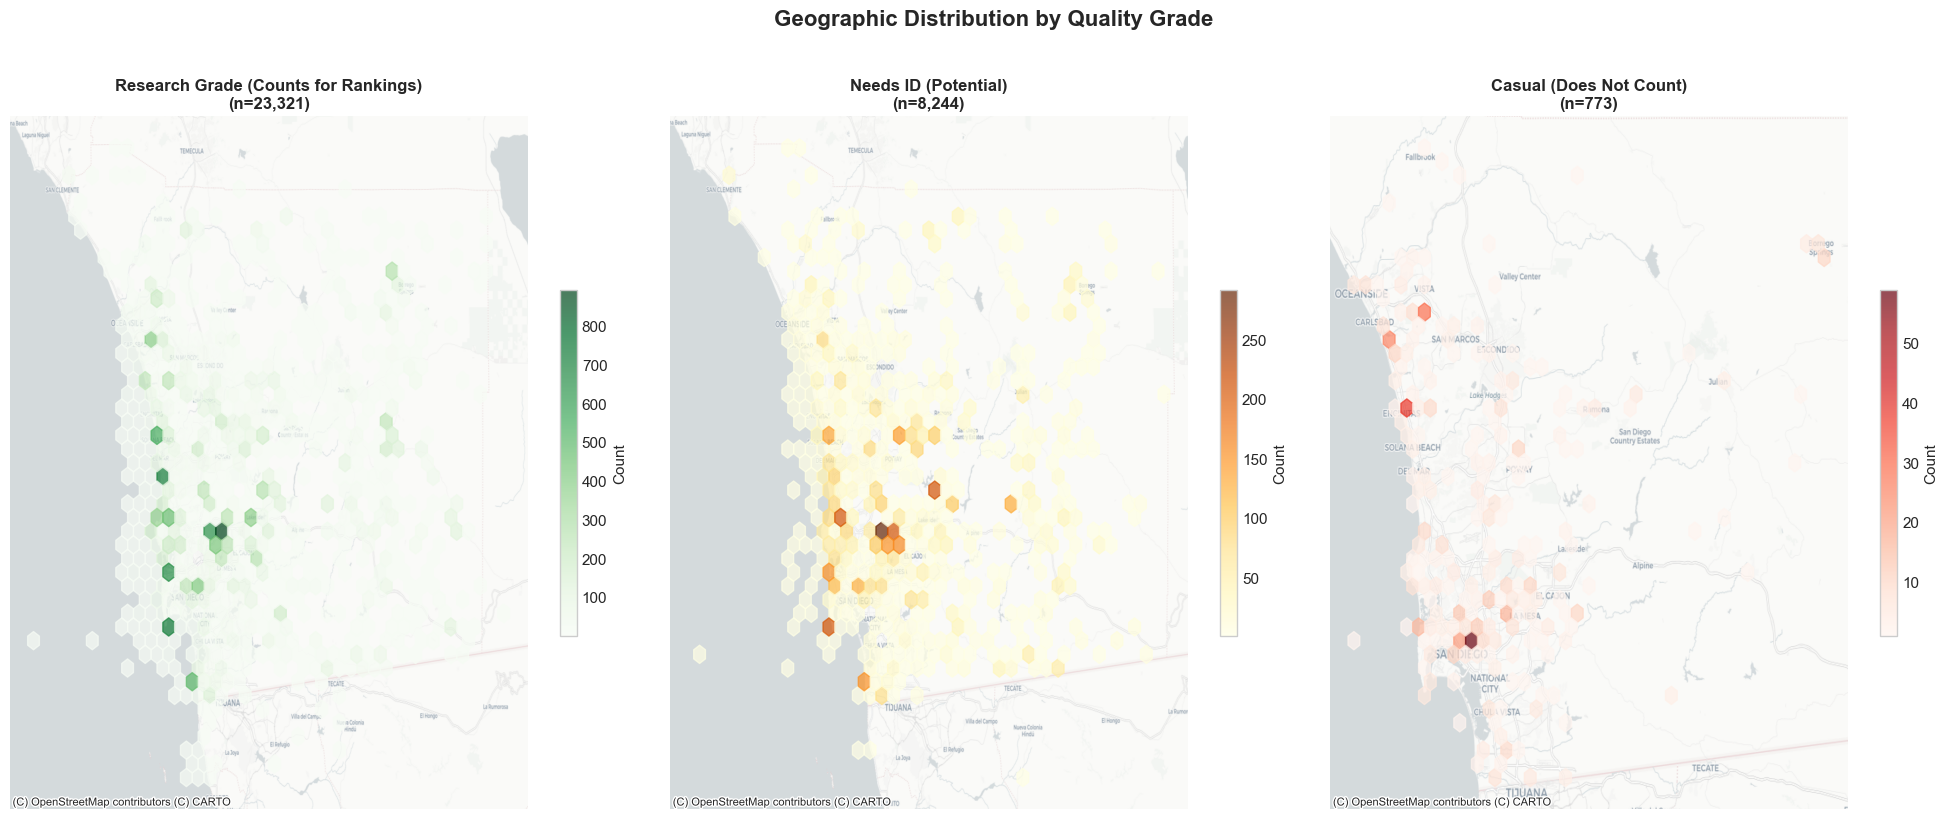


💡 INSIGHT: Compare where research-grade vs needs_id observations cluster.
   Areas with high 'needs_id' density are prime targets for identification efforts!


In [26]:
# Heatmap by Quality Grade - Side by side comparison
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

quality_grades = ['research', 'needs_id', 'casual']
cmaps = ['Greens', 'YlOrBr', 'Reds']
titles = ['Research Grade (Counts for Rankings)', 'Needs ID (Potential)', 'Casual (Does Not Count)']

for ax, grade, cmap, title in zip(axes, quality_grades, cmaps, titles):
    gdf_grade = gdf_mercator[gdf_mercator['quality_grade'] == grade]
    
    if len(gdf_grade) > 0:
        hb = ax.hexbin(
            gdf_grade.geometry.x, 
            gdf_grade.geometry.y, 
            gridsize=40,
            cmap=cmap,
            mincnt=1,
            alpha=0.7
        )
        ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=10)
        plt.colorbar(hb, ax=ax, label='Count', shrink=0.5)
    
    ax.set_title(f'{title}\n(n={len(gdf_grade):,})', fontsize=12, fontweight='bold')
    ax.set_axis_off()

plt.suptitle('Geographic Distribution by Quality Grade', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n💡 INSIGHT: Compare where research-grade vs needs_id observations cluster.")
print("   Areas with high 'needs_id' density are prime targets for identification efforts!")

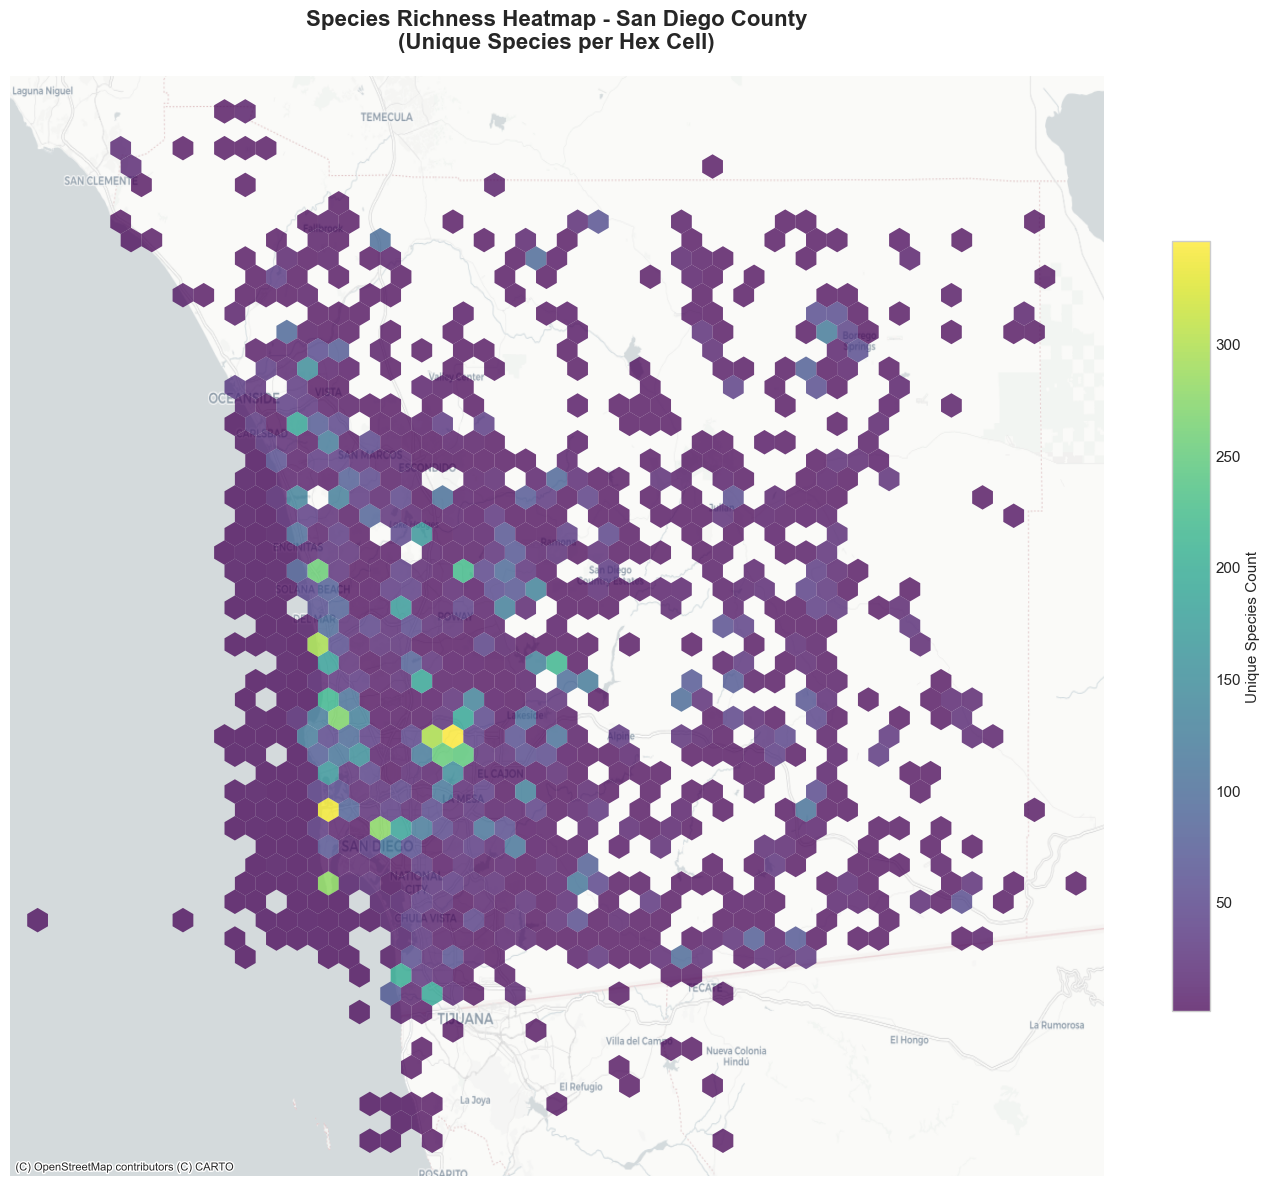


💡 INSIGHT: Species richness map shows biodiversity hotspots vs cold spots.
   Max species in a single hex: 346
   Average species per hex: 21.1
   High observation density ≠ high species diversity - some areas may be over-sampled with common species.


In [46]:
# Species Richness Map - Unique species per hex cell
fig, ax = plt.subplots(figsize=(14, 12))

# Get coordinates
x = gdf_mercator.geometry.x.values
y = gdf_mercator.geometry.y.values

# Create a mapping of species to numeric codes for hexbin
species_codes = pd.factorize(gdf_mercator['scientific_name'])[0]

# Custom reduce function to count unique species in each hex bin
def count_unique(values):
    return len(np.unique(values))

# Plot hexbin with species richness using reduce function
hb = ax.hexbin(
    x, y,
    C=species_codes,
    gridsize=50,
    cmap='viridis',
    reduce_C_function=count_unique,
    mincnt=1,
    alpha=0.75,
    edgecolors='none'
)

# Add basemap AFTER the hexbin so it doesn't cover the data
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=10, zorder=-1)

# Set axis limits to match the data extent with padding
padding = 5000
ax.set_xlim(x.min() - padding, x.max() + padding)
ax.set_ylim(y.min() - padding, y.max() + padding)

# Add colorbar
cb = plt.colorbar(hb, ax=ax, label='Unique Species Count', shrink=0.7)

ax.set_title('Species Richness Heatmap - San Diego County\n(Unique Species per Hex Cell)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_axis_off()

plt.tight_layout()
plt.show()

# Print some stats
print(f"\n💡 INSIGHT: Species richness map shows biodiversity hotspots vs cold spots.")
print(f"   Max species in a single hex: {int(hb.get_array().max())}")
print(f"   Average species per hex: {hb.get_array().mean():.1f}")
print("   High observation density ≠ high species diversity - some areas may be over-sampled with common species.")

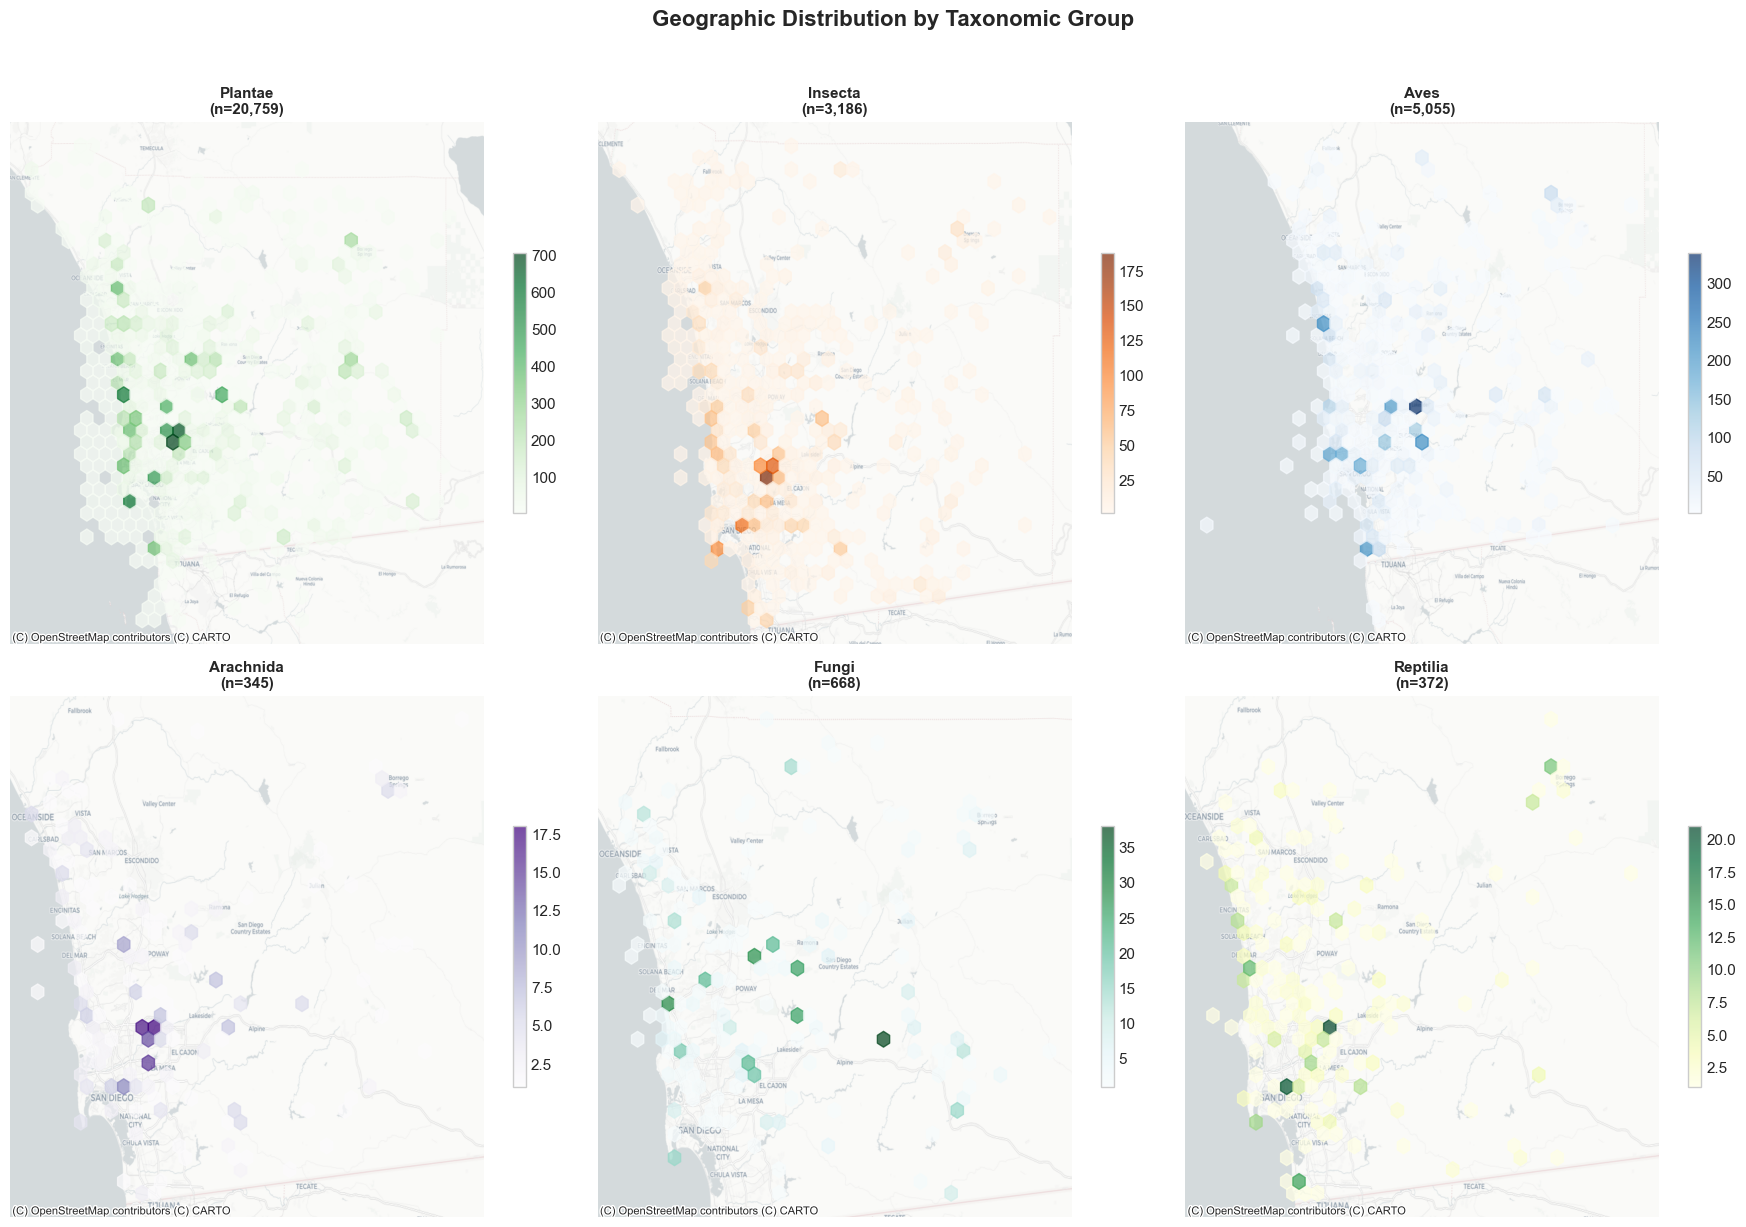


💡 INSIGHT: Different taxonomic groups show different geographic patterns.
   - Birds (Aves) may cluster near wetlands/coastal areas
   - Insects might be more evenly distributed
   - Some taxa may have geographic gaps worth targeting


In [28]:
# Taxonomic Group Heatmaps - Where are different organisms observed?
top_taxa = ['Plantae', 'Insecta', 'Aves', 'Arachnida', 'Fungi', 'Reptilia']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

taxon_colors = {
    'Plantae': 'Greens',
    'Insecta': 'Oranges', 
    'Aves': 'Blues',
    'Arachnida': 'Purples',
    'Fungi': 'BuGn',
    'Reptilia': 'YlGn'
}

for ax, taxon in zip(axes, top_taxa):
    gdf_taxon = gdf_mercator[gdf_mercator['iconic_taxon_name'] == taxon]
    
    if len(gdf_taxon) > 0:
        hb = ax.hexbin(
            gdf_taxon.geometry.x, 
            gdf_taxon.geometry.y, 
            gridsize=35,
            cmap=taxon_colors.get(taxon, 'YlOrRd'),
            mincnt=1,
            alpha=0.7
        )
        ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=10)
        plt.colorbar(hb, ax=ax, shrink=0.5)
    
    ax.set_title(f'{taxon}\n(n={len(gdf_taxon):,})', fontsize=11, fontweight='bold')
    ax.set_axis_off()

plt.suptitle('Geographic Distribution by Taxonomic Group', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n💡 INSIGHT: Different taxonomic groups show different geographic patterns.")
print("   - Birds (Aves) may cluster near wetlands/coastal areas")
print("   - Insects might be more evenly distributed")
print("   - Some taxa may have geographic gaps worth targeting")

## 2.2 Temporal Analysis - When Do People Observe?

Understanding temporal patterns can help optimize outreach and event planning for future challenges.

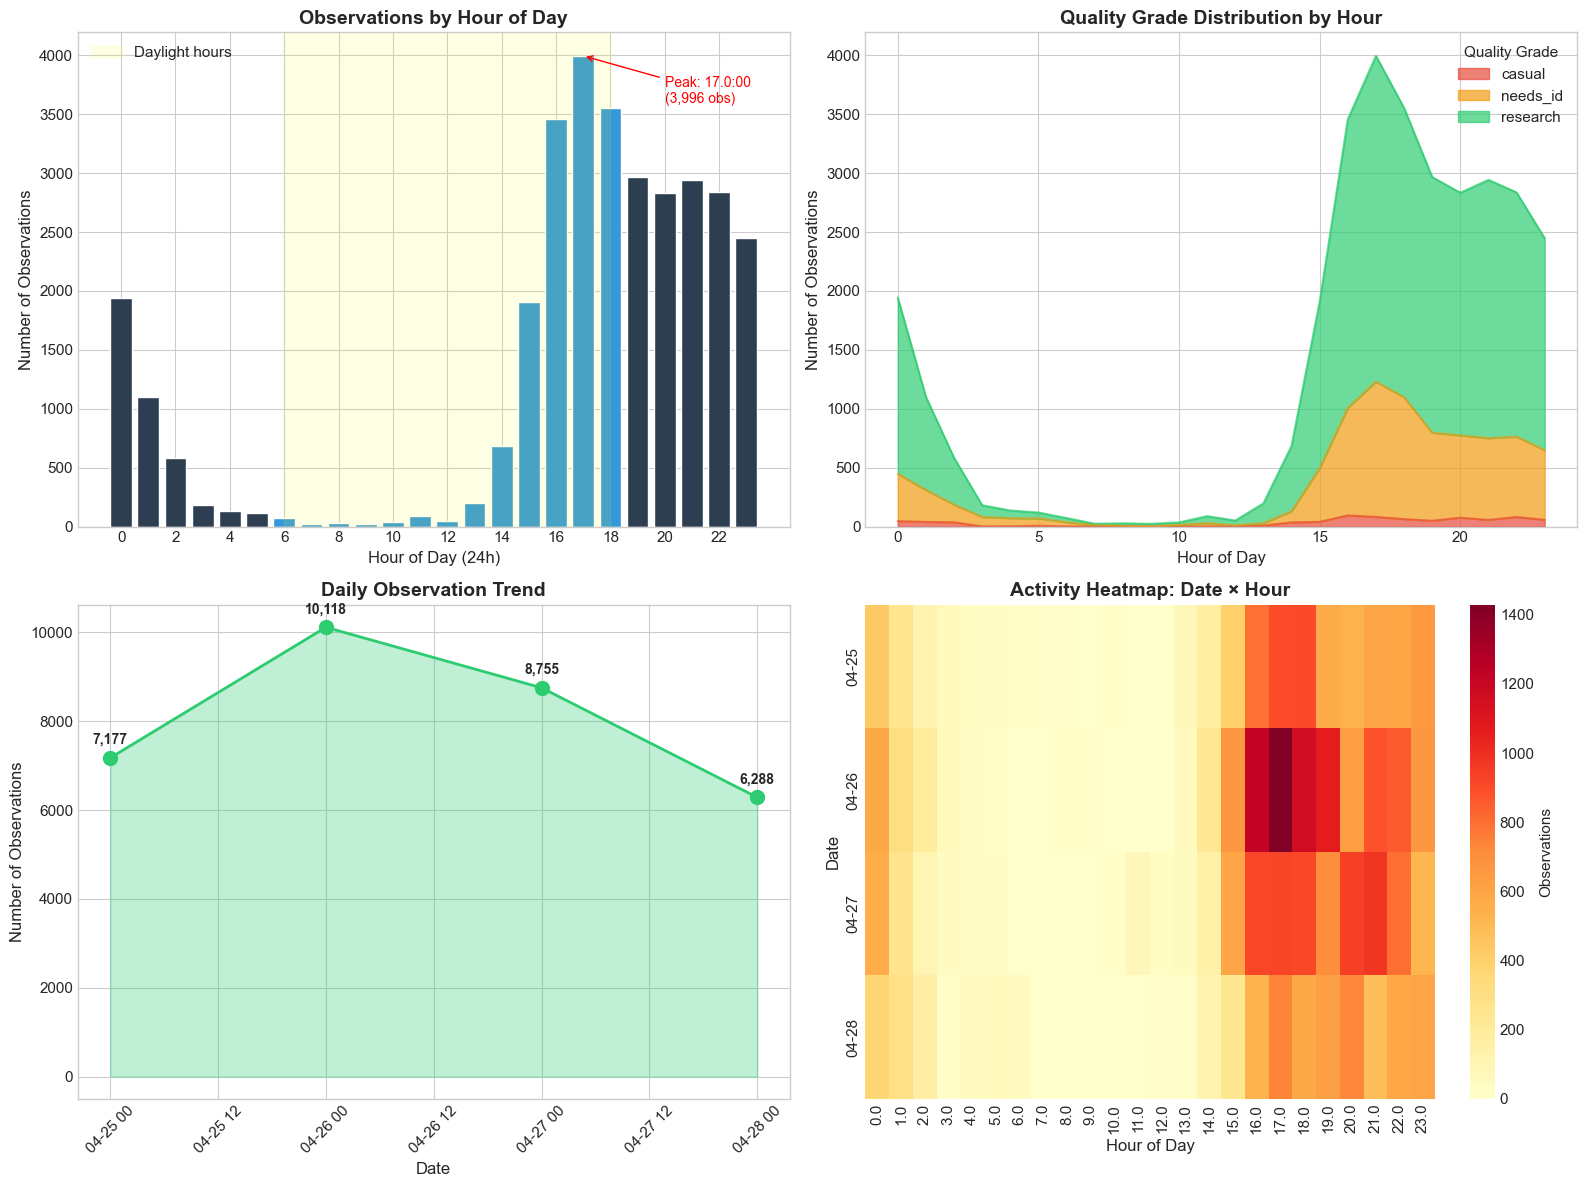


💡 TEMPORAL INSIGHTS:
   Peak observation hour: 17.0:00 (3,996 observations)
   Most active day: Saturday, Apr 26 (10,118 observations)
   Least active day: Monday, Apr 28 (6,288 observations)


In [29]:
# Extract time components
df['hour_observed'] = pd.to_datetime(df['time_observed_at']).dt.hour
df['day_of_week'] = df['observed_on'].dt.day_name()
df['date_str'] = df['observed_on'].dt.strftime('%b %d')

# Hourly distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Observations by Hour
ax1 = axes[0, 0]
hourly_counts = df['hour_observed'].value_counts().sort_index()
colors = ['#3498db' if 6 <= h <= 18 else '#2c3e50' for h in hourly_counts.index]
bars = ax1.bar(hourly_counts.index, hourly_counts.values, color=colors, edgecolor='white')
ax1.set_xlabel('Hour of Day (24h)', fontsize=12)
ax1.set_ylabel('Number of Observations', fontsize=12)
ax1.set_title('Observations by Hour of Day', fontsize=14, fontweight='bold')
ax1.set_xticks(range(0, 24, 2))
ax1.axvspan(6, 18, alpha=0.1, color='yellow', label='Daylight hours')
ax1.legend()

# Add peak annotation
peak_hour = hourly_counts.idxmax()
ax1.annotate(f'Peak: {peak_hour}:00\n({hourly_counts.max():,} obs)', 
             xy=(peak_hour, hourly_counts.max()), 
             xytext=(peak_hour+3, hourly_counts.max()*0.9),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10, color='red')

# 2. Hourly pattern by Quality Grade
ax2 = axes[0, 1]
hourly_quality = df.groupby(['hour_observed', 'quality_grade']).size().unstack(fill_value=0)
hourly_quality.plot(kind='area', stacked=True, ax=ax2, alpha=0.7,
                    color=['#e74c3c', '#f39c12', '#2ecc71'])
ax2.set_xlabel('Hour of Day', fontsize=12)
ax2.set_ylabel('Number of Observations', fontsize=12)
ax2.set_title('Quality Grade Distribution by Hour', fontsize=14, fontweight='bold')
ax2.legend(title='Quality Grade')

# 3. Observations by Day
ax3 = axes[1, 0]
daily_counts = df.groupby('observed_on').size()
ax3.plot(daily_counts.index, daily_counts.values, marker='o', linewidth=2, markersize=10, color='#2ecc71')
ax3.fill_between(daily_counts.index, daily_counts.values, alpha=0.3, color='#2ecc71')
ax3.set_xlabel('Date', fontsize=12)
ax3.set_ylabel('Number of Observations', fontsize=12)
ax3.set_title('Daily Observation Trend', fontsize=14, fontweight='bold')
ax3.tick_params(axis='x', rotation=45)

for i, (date, count) in enumerate(daily_counts.items()):
    ax3.annotate(f'{count:,}', (date, count), textcoords="offset points", 
                 xytext=(0,10), ha='center', fontsize=10, fontweight='bold')

# 4. Heatmap: Hour vs Day
ax4 = axes[1, 1]
heatmap_data = df.groupby([df['observed_on'].dt.strftime('%m-%d'), 'hour_observed']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap='YlOrRd', ax=ax4, cbar_kws={'label': 'Observations'})
ax4.set_xlabel('Hour of Day', fontsize=12)
ax4.set_ylabel('Date', fontsize=12)
ax4.set_title('Activity Heatmap: Date × Hour', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n💡 TEMPORAL INSIGHTS:")
print(f"   Peak observation hour: {peak_hour}:00 ({hourly_counts.max():,} observations)")
print(f"   Most active day: {daily_counts.idxmax().strftime('%A, %b %d')} ({daily_counts.max():,} observations)")
print(f"   Least active day: {daily_counts.idxmin().strftime('%A, %b %d')} ({daily_counts.min():,} observations)")

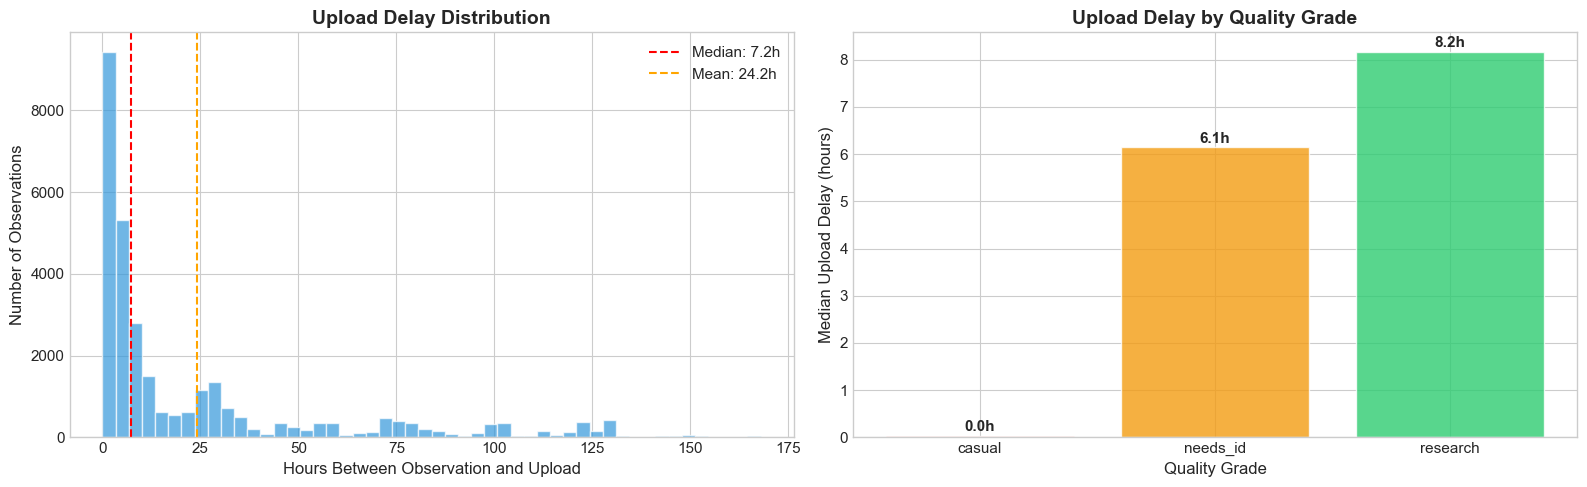


📤 UPLOAD DELAY INSIGHTS:
   Instant uploads (<1 hour): 6,192 (20.1%)
   Same-day uploads (<24 hours): 20,978 (68.2%)
   Delayed uploads (>24 hours): 9,775 (31.8%)


In [30]:
# Upload Delay Analysis - How long between observation and upload?
df['upload_delay_hours'] = (df['created_at'] - df['time_observed_at']).dt.total_seconds() / 3600

# Filter out invalid delays (negative or extremely large)
valid_delays = df[(df['upload_delay_hours'] >= 0) & (df['upload_delay_hours'] < 168)]  # Within 1 week

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Distribution of upload delays
ax1 = axes[0]
ax1.hist(valid_delays['upload_delay_hours'], bins=50, color='#3498db', edgecolor='white', alpha=0.7)
ax1.axvline(x=valid_delays['upload_delay_hours'].median(), color='red', linestyle='--', 
            label=f"Median: {valid_delays['upload_delay_hours'].median():.1f}h")
ax1.axvline(x=valid_delays['upload_delay_hours'].mean(), color='orange', linestyle='--', 
            label=f"Mean: {valid_delays['upload_delay_hours'].mean():.1f}h")
ax1.set_xlabel('Hours Between Observation and Upload', fontsize=12)
ax1.set_ylabel('Number of Observations', fontsize=12)
ax1.set_title('Upload Delay Distribution', fontsize=14, fontweight='bold')
ax1.legend()

# Upload delay by quality grade
ax2 = axes[1]
delay_by_quality = valid_delays.groupby('quality_grade')['upload_delay_hours'].agg(['mean', 'median'])
colors = ['#e74c3c', '#f39c12', '#2ecc71']
x_pos = range(len(delay_by_quality))
bars = ax2.bar(x_pos, delay_by_quality['median'], color=colors, edgecolor='white', alpha=0.8)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(delay_by_quality.index)
ax2.set_xlabel('Quality Grade', fontsize=12)
ax2.set_ylabel('Median Upload Delay (hours)', fontsize=12)
ax2.set_title('Upload Delay by Quality Grade', fontsize=14, fontweight='bold')

for bar, val in zip(bars, delay_by_quality['median']):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{val:.1f}h', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Stats
print(f"\n📤 UPLOAD DELAY INSIGHTS:")
print(f"   Instant uploads (<1 hour): {(valid_delays['upload_delay_hours'] < 1).sum():,} ({(valid_delays['upload_delay_hours'] < 1).mean()*100:.1f}%)")
print(f"   Same-day uploads (<24 hours): {(valid_delays['upload_delay_hours'] < 24).sum():,} ({(valid_delays['upload_delay_hours'] < 24).mean()*100:.1f}%)")
print(f"   Delayed uploads (>24 hours): {(valid_delays['upload_delay_hours'] >= 24).sum():,} ({(valid_delays['upload_delay_hours'] >= 24).mean()*100:.1f}%)")

## 2.3 User/Contributor Analysis

Understanding contributor patterns is crucial - a few power users often drive the majority of observations (Pareto principle).

In [31]:
# User contribution analysis
user_stats = df.groupby('user_id').agg({
    'id': 'count',
    'quality_grade': lambda x: (x == 'research').sum(),
    'scientific_name': 'nunique',
    'user_login': 'first'
}).rename(columns={
    'id': 'total_obs',
    'quality_grade': 'research_grade_obs',
    'scientific_name': 'unique_species'
})
user_stats['research_rate'] = user_stats['research_grade_obs'] / user_stats['total_obs'] * 100
user_stats = user_stats.sort_values('total_obs', ascending=False)

print("=" * 70)
print("USER CONTRIBUTION ANALYSIS")
print("=" * 70)

print(f"\n👥 Total unique observers: {len(user_stats):,}")
print(f"   Average observations per user: {user_stats['total_obs'].mean():.1f}")
print(f"   Median observations per user: {user_stats['total_obs'].median():.1f}")

# Pareto analysis
total_obs = user_stats['total_obs'].sum()
user_stats['cumulative_obs'] = user_stats['total_obs'].cumsum()
user_stats['cumulative_pct'] = user_stats['cumulative_obs'] / total_obs * 100

# Find 80% threshold
users_for_80 = (user_stats['cumulative_pct'] <= 80).sum() + 1
pct_users_for_80 = users_for_80 / len(user_stats) * 100

print(f"\n📊 PARETO ANALYSIS:")
print(f"   Top {users_for_80:,} users ({pct_users_for_80:.1f}%) contribute 80% of observations")
print(f"   Top 10 users contribute: {user_stats.head(10)['total_obs'].sum():,} observations ({user_stats.head(10)['total_obs'].sum()/total_obs*100:.1f}%)")
print(f"   Top 50 users contribute: {user_stats.head(50)['total_obs'].sum():,} observations ({user_stats.head(50)['total_obs'].sum()/total_obs*100:.1f}%)")

USER CONTRIBUTION ANALYSIS

👥 Total unique observers: 1,297
   Average observations per user: 24.9
   Median observations per user: 3.0

📊 PARETO ANALYSIS:
   Top 174 users (13.4%) contribute 80% of observations
   Top 10 users contribute: 8,428 observations (26.1%)
   Top 50 users contribute: 18,066 observations (55.9%)


In [49]:
# Top contributors table
print("\n TOP 20 CONTRIBUTORS:")
print("─" * 80)
top_20 = user_stats.head(20)[['user_login', 'total_obs', 'research_grade_obs', 'unique_species', 'research_rate']]
top_20.columns = ['Username', 'Total Obs', 'Research Grade', 'Unique Species', 'Research Rate %']
top_20.index = range(1, 21)
print(top_20.to_string())


 TOP 20 CONTRIBUTORS:
────────────────────────────────────────────────────────────────────────────────
           Username  Total Obs  Research Grade  Unique Species  Research Rate %
1     mikethebirder       1524             985             914            64.63
2         sglevanik       1123             986             332            87.80
3         fillsteak       1027             901             376            87.73
4    hikingsandiego        851             690             412            81.08
5   planetaverde303        849             837              60            98.59
6      carrotpeople        833             507             493            60.86
7   naturalistspace        668             442             282            66.17
8          klyle161        546             374             346            68.50
9      jamessanders        522             234             109            44.83
10       lafiametta        485             300             370            61.86
11         miram

Top 174 users: 25,878 observations (80.0%)
Other users: 6,460 observations (20.0%)


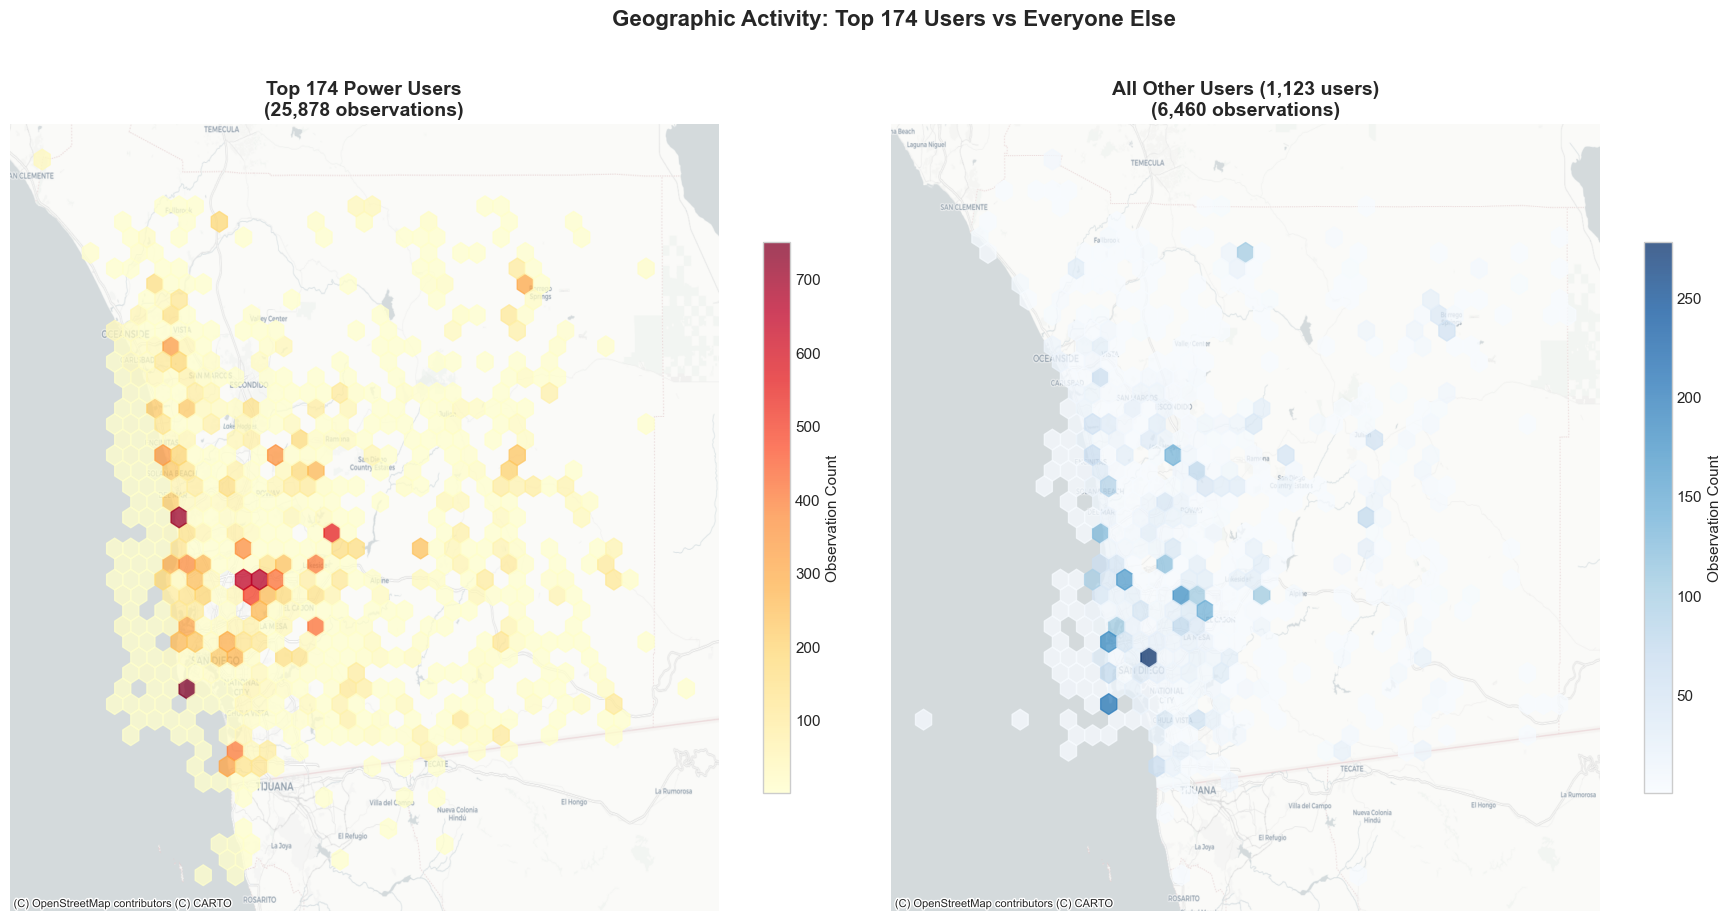


💡 INSIGHT: Top 174 users contribute 80.0% of all observations
   Compare coverage patterns - are power users reaching different areas than casual users?


In [47]:
# Geographic Heatmap: Where are the Top 174 Users Active?
# These power users drive the majority of observations - understanding their coverage is key

# Get top 174 user IDs
top_174_user_ids = user_stats.head(174).index.tolist()

# Filter observations from top 174 users
top_users_obs = gdf_mercator[gdf_mercator['user_id'].isin(top_174_user_ids)]
other_users_obs = gdf_mercator[~gdf_mercator['user_id'].isin(top_174_user_ids)]

print(f"Top 174 users: {len(top_users_obs):,} observations ({len(top_users_obs)/len(gdf_mercator)*100:.1f}%)")
print(f"Other users: {len(other_users_obs):,} observations ({len(other_users_obs)/len(gdf_mercator)*100:.1f}%)")

# Create side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

# 1. Top 174 Users Heatmap
ax1 = axes[0]
if len(top_users_obs) > 0:
    hb1 = ax1.hexbin(
        top_users_obs.geometry.x,
        top_users_obs.geometry.y,
        gridsize=40,
        cmap='YlOrRd',
        mincnt=1,
        alpha=0.75
    )
    ctx.add_basemap(ax1, source=ctx.providers.CartoDB.Positron, zoom=10, zorder=-1)
    plt.colorbar(hb1, ax=ax1, label='Observation Count', shrink=0.7)
    
ax1.set_title(f'Top 174 Power Users\n({len(top_users_obs):,} observations)', 
              fontsize=14, fontweight='bold')
ax1.set_axis_off()

# 2. Other Users Heatmap (for comparison)
ax2 = axes[1]
if len(other_users_obs) > 0:
    hb2 = ax2.hexbin(
        other_users_obs.geometry.x,
        other_users_obs.geometry.y,
        gridsize=40,
        cmap='Blues',
        mincnt=1,
        alpha=0.75
    )
    ctx.add_basemap(ax2, source=ctx.providers.CartoDB.Positron, zoom=10, zorder=-1)
    plt.colorbar(hb2, ax=ax2, label='Observation Count', shrink=0.7)

ax2.set_title(f'All Other Users ({len(user_stats) - 174:,} users)\n({len(other_users_obs):,} observations)', 
              fontsize=14, fontweight='bold')
ax2.set_axis_off()

plt.suptitle('Geographic Activity: Top 174 Users vs Everyone Else', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(f"\n💡 INSIGHT: Top 174 users contribute {len(top_users_obs)/len(gdf_mercator)*100:.1f}% of all observations")
print("   Compare coverage patterns - are power users reaching different areas than casual users?")

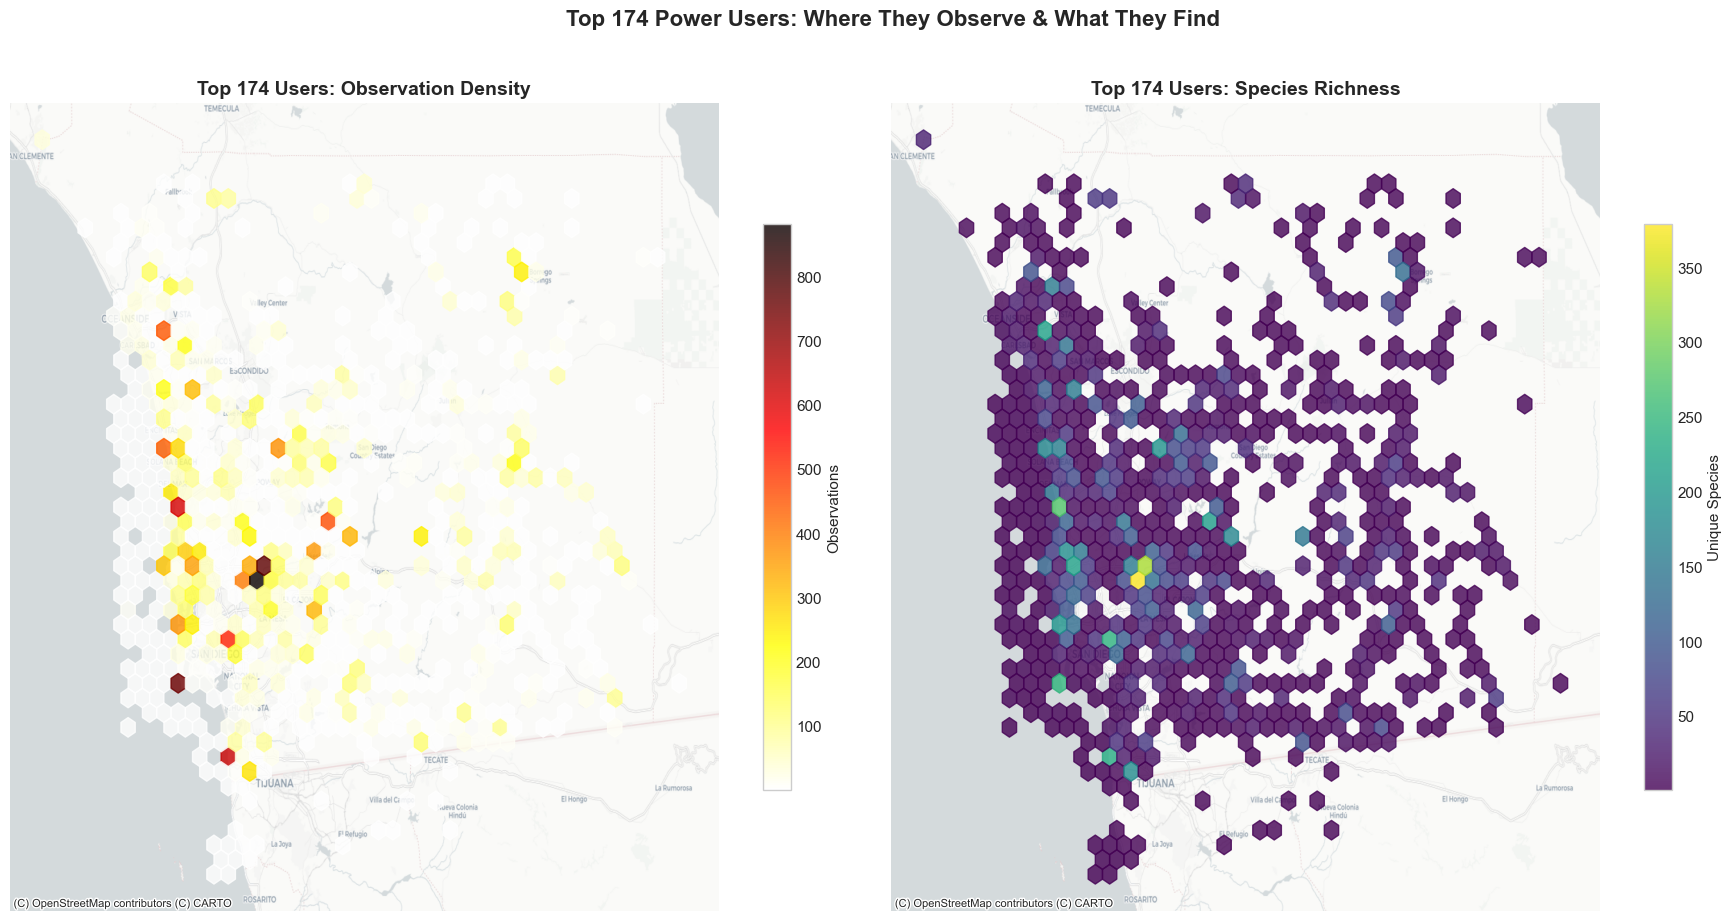


📊 TOP 174 USERS STATISTICS:
   Total observations: 25,878
   Unique species observed: 3,311
   Research-grade observations: 19,075 (73.7%)
   Species per observation ratio: 0.128


In [48]:
# Detailed Analysis: Top 174 Users - Species Richness vs Observation Density
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

# Get coordinates for top users
x_top = top_users_obs.geometry.x.values
y_top = top_users_obs.geometry.y.values

# 1. Observation Density for Top 174
ax1 = axes[0]
hb1 = ax1.hexbin(x_top, y_top, gridsize=45, cmap='hot_r', mincnt=1, alpha=0.8)
ctx.add_basemap(ax1, source=ctx.providers.CartoDB.Positron, zoom=10, zorder=-1)
plt.colorbar(hb1, ax=ax1, label='Observations', shrink=0.7)
ax1.set_title('Top 174 Users: Observation Density', fontsize=14, fontweight='bold')
ax1.set_axis_off()

# 2. Species Richness for Top 174 Users
ax2 = axes[1]
species_codes_top = pd.factorize(top_users_obs['scientific_name'])[0]

def count_unique(values):
    return len(np.unique(values))

hb2 = ax2.hexbin(
    x_top, y_top,
    C=species_codes_top,
    gridsize=45,
    cmap='viridis',
    reduce_C_function=count_unique,
    mincnt=1,
    alpha=0.8
)
ctx.add_basemap(ax2, source=ctx.providers.CartoDB.Positron, zoom=10, zorder=-1)
plt.colorbar(hb2, ax=ax2, label='Unique Species', shrink=0.7)
ax2.set_title('Top 174 Users: Species Richness', fontsize=14, fontweight='bold')
ax2.set_axis_off()

plt.suptitle('Top 174 Power Users: Where They Observe & What They Find', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Calculate stats for top users
top_user_species = top_users_obs['scientific_name'].nunique()
top_user_research = (top_users_obs['quality_grade'] == 'research').sum()
print(f"\n📊 TOP 174 USERS STATISTICS:")
print(f"   Total observations: {len(top_users_obs):,}")
print(f"   Unique species observed: {top_user_species:,}")
print(f"   Research-grade observations: {top_user_research:,} ({top_user_research/len(top_users_obs)*100:.1f}%)")
print(f"   Species per observation ratio: {top_user_species/len(top_users_obs):.3f}")

## 2.4 Species Diversity Analysis

Examining which species are being observed, identification patterns, and potential gaps in species coverage.

In [34]:
# Species analysis
species_stats = df.groupby('scientific_name').agg({
    'id': 'count',
    'quality_grade': lambda x: (x == 'research').sum(),
    'iconic_taxon_name': 'first',
    'common_name': 'first',
    'num_identification_agreements': 'mean',
    'num_identification_disagreements': 'mean'
}).rename(columns={
    'id': 'observation_count',
    'quality_grade': 'research_count'
})
species_stats['research_rate'] = species_stats['research_count'] / species_stats['observation_count'] * 100
species_stats = species_stats.sort_values('observation_count', ascending=False)

print("=" * 70)
print("SPECIES DIVERSITY ANALYSIS")
print("=" * 70)

total_species = len(species_stats)
research_species = (species_stats['research_count'] > 0).sum()

print(f"\n🦋 Total unique species/taxa: {total_species:,}")
print(f"   Species with at least 1 research-grade: {research_species:,} ({research_species/total_species*100:.1f}%)")
print(f"   Average observations per species: {species_stats['observation_count'].mean():.1f}")
print(f"   Median observations per species: {species_stats['observation_count'].median():.1f}")

# Singleton species (observed only once)
singletons = (species_stats['observation_count'] == 1).sum()
print(f"\n   Singleton species (observed once): {singletons:,} ({singletons/total_species*100:.1f}%)")
print(f"   Species observed 2-5 times: {((species_stats['observation_count'] >= 2) & (species_stats['observation_count'] <= 5)).sum():,}")
print(f"   Species observed 5+ times: {(species_stats['observation_count'] > 5).sum():,}")

SPECIES DIVERSITY ANALYSIS

🦋 Total unique species/taxa: 3,853
   Species with at least 1 research-grade: 2,012 (52.2%)
   Average observations per species: 8.4
   Median observations per species: 2.0

   Singleton species (observed once): 1,598 (41.5%)
   Species observed 2-5 times: 1,237
   Species observed 5+ times: 1,018


In [35]:
# Top 30 most observed species
print("\n🔝 TOP 30 MOST OBSERVED SPECIES:")
print("─" * 90)
top_species = species_stats.head(30)[['common_name', 'iconic_taxon_name', 'observation_count', 'research_count', 'research_rate']]
top_species.columns = ['Common Name', 'Taxon', 'Observations', 'Research Grade', 'Research %']
print(top_species.to_string())


🔝 TOP 30 MOST OBSERVED SPECIES:
──────────────────────────────────────────────────────────────────────────────────────────
                                                      Common Name     Taxon  Observations  Research Grade  Research %
scientific_name                                                                                                      
Eriogonum fasciculatum                       California Buckwheat   Plantae           274             269       98.18
Encelia californica                        California brittlebush   Plantae           267             259       97.00
Marah macrocarpa                                       Chilicothe   Plantae           261             261      100.00
Diplacus puniceus                           red bush monkeyflower   Plantae           234             226       96.58
Haemorhous mexicanus                                  House Finch      Aves           225             222       98.67
Artemisia californica                        Calif

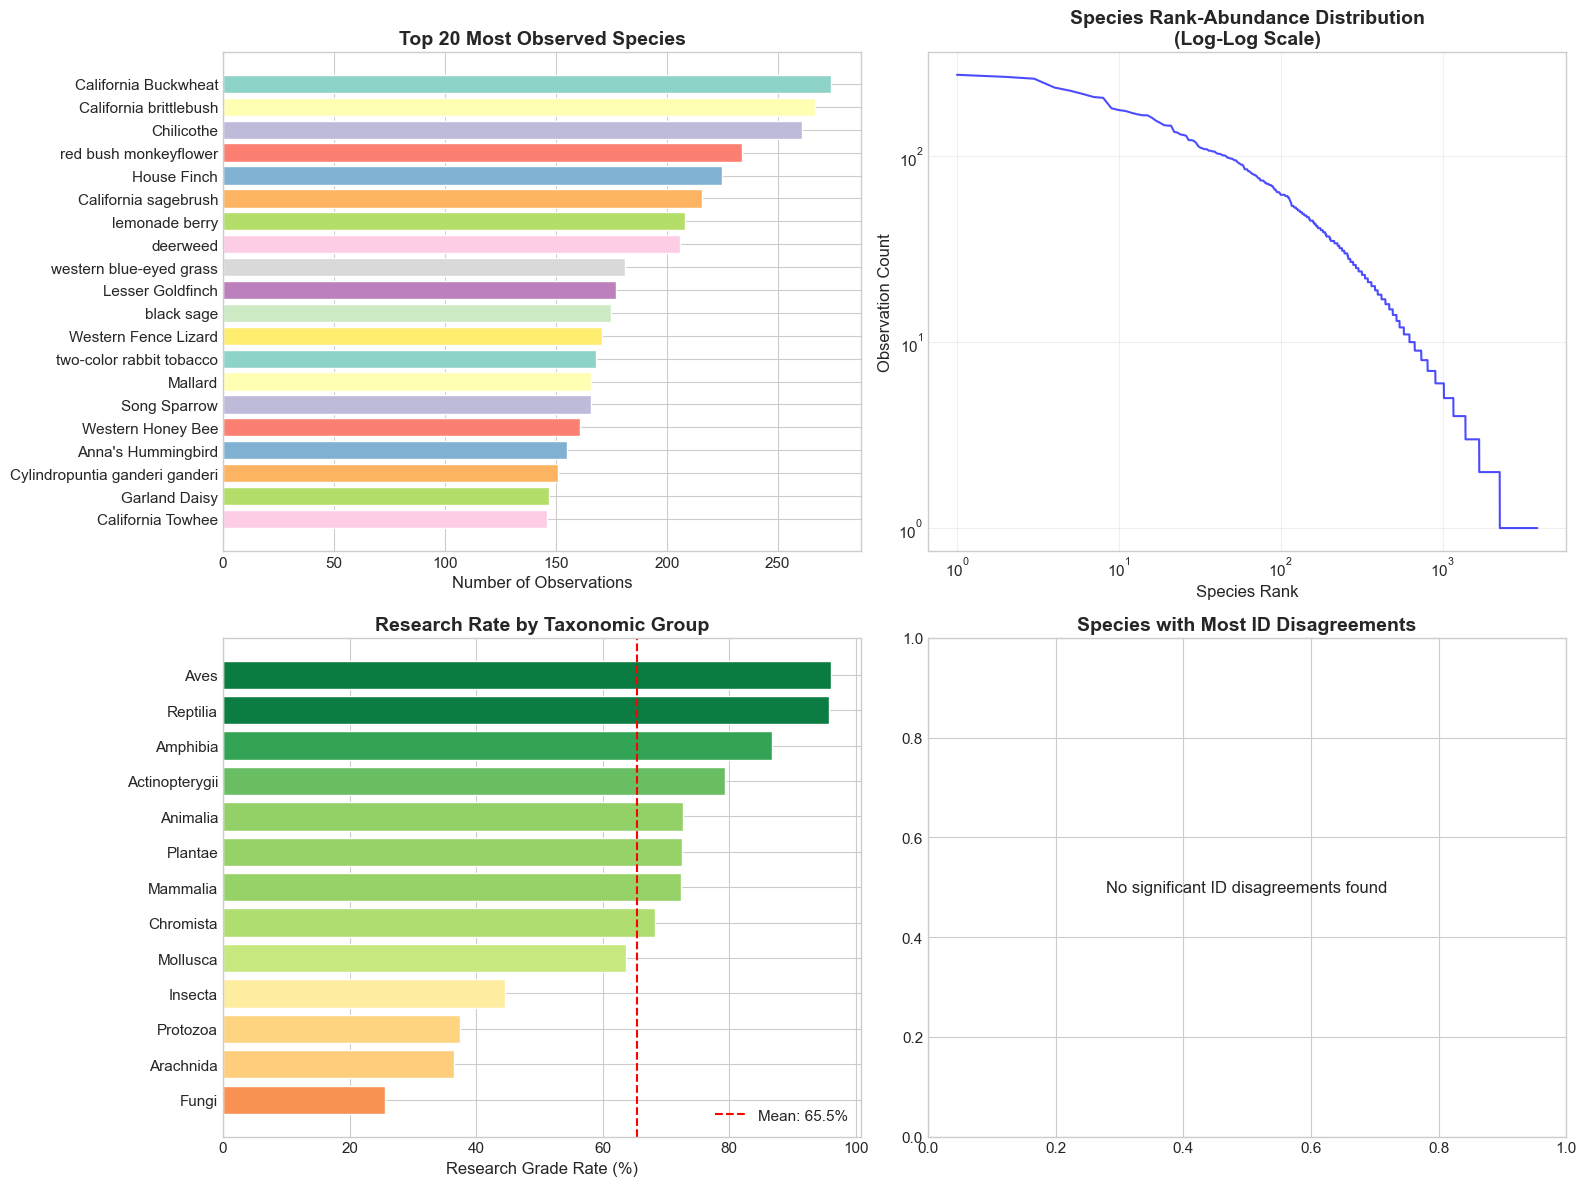

In [50]:
# Visualize species patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top 20 species bar chart
ax1 = axes[0, 0]
top_20_species = species_stats.head(20)
y_pos = range(len(top_20_species))
colors = [plt.cm.Set3(i % 12) for i in range(len(top_20_species))]
bars = ax1.barh(y_pos, top_20_species['observation_count'].values, color=colors, edgecolor='white')
ax1.set_yticks(y_pos)
# Use scientific name (index) where common name is missing
labels = [cn if pd.notna(cn) else sn for cn, sn in zip(top_20_species['common_name'], top_20_species.index)]
ax1.set_yticklabels([str(n)[:30] + '...' if len(str(n)) > 30 else str(n) for n in labels])
ax1.invert_yaxis()
ax1.set_xlabel('Number of Observations', fontsize=12)
ax1.set_title('Top 20 Most Observed Species', fontsize=14, fontweight='bold')

# 2. Species observation distribution (log-log)
ax2 = axes[0, 1]
species_rank = range(1, len(species_stats) + 1)
ax2.loglog(species_rank, species_stats['observation_count'].values, 'b-', alpha=0.7)
ax2.set_xlabel('Species Rank', fontsize=12)
ax2.set_ylabel('Observation Count', fontsize=12)
ax2.set_title('Species Rank-Abundance Distribution\n(Log-Log Scale)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# 3. Research rate by taxonomic group
ax3 = axes[1, 0]
taxon_research = df.groupby('iconic_taxon_name').agg({
    'id': 'count',
    'quality_grade': lambda x: (x == 'research').mean() * 100
}).rename(columns={'id': 'count', 'quality_grade': 'research_rate'})
taxon_research = taxon_research.sort_values('research_rate', ascending=True)

colors = plt.cm.RdYlGn(taxon_research['research_rate'] / 100)
bars = ax3.barh(taxon_research.index, taxon_research['research_rate'], color=colors, edgecolor='white')
ax3.set_xlabel('Research Grade Rate (%)', fontsize=12)
ax3.set_title('Research Rate by Taxonomic Group', fontsize=14, fontweight='bold')
ax3.axvline(x=taxon_research['research_rate'].mean(), color='red', linestyle='--', 
            label=f'Mean: {taxon_research["research_rate"].mean():.1f}%')
ax3.legend()

# 4. Species with identification issues (high disagreements)
ax4 = axes[1, 1]
# Focus on species with multiple observations and disagreements
species_with_issues = species_stats[
    (species_stats['observation_count'] >= 10) & 
    (species_stats['num_identification_disagreements'] > 0.5)
].nlargest(15, 'num_identification_disagreements')

if len(species_with_issues) > 0:
    y_pos = range(len(species_with_issues))
    ax4.barh(y_pos, species_with_issues['num_identification_disagreements'].values, 
             color='#e74c3c', edgecolor='white', alpha=0.8)
    ax4.set_yticks(y_pos)
    # Use scientific name (index) where common name is missing
    labels_issues = [cn if pd.notna(cn) else sn for cn, sn in zip(species_with_issues['common_name'], species_with_issues.index)]
    ax4.set_yticklabels([str(n)[:25] + '...' if len(str(n)) > 25 else str(n) for n in labels_issues])
    ax4.invert_yaxis()
    ax4.set_xlabel('Avg ID Disagreements per Observation', fontsize=12)
    ax4.set_title('Species with Most ID Disagreements\n(Potential misidentifications)', fontsize=14, fontweight='bold')
else:
    ax4.text(0.5, 0.5, 'No significant ID disagreements found', ha='center', va='center', fontsize=12)
    ax4.set_title('Species with Most ID Disagreements', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 2.5 Identification Bottleneck Analysis

Deep dive into "needs_id" observations - understanding what's blocking them from becoming research-grade.

In [37]:
# Focus on needs_id observations
needs_id_df = df[df['quality_grade'] == 'needs_id'].copy()

print("=" * 70)
print("'NEEDS ID' BOTTLENECK ANALYSIS")
print("=" * 70)
print(f"\nTotal 'needs_id' observations: {len(needs_id_df):,}")

# Why are they stuck? Let's analyze
print("\n📊 BREAKDOWN OF 'NEEDS_ID' OBSERVATIONS:")

# By identification agreements
print("\n  By Current ID Agreements:")
agreement_dist = needs_id_df['num_identification_agreements'].value_counts().sort_index()
for agreements, count in agreement_dist.head(6).items():
    pct = count / len(needs_id_df) * 100
    status = "⚠️ Need 1 more ID" if agreements == 1 else "🔴 Need 2+ IDs" if agreements == 0 else "✅ Has consensus"
    print(f"    {agreements} agreements: {count:,} ({pct:.1f}%) {status}")

# Key insight: observations needing just 1 more ID
needs_one_more = (needs_id_df['num_identification_agreements'] == 1).sum()
print(f"\n  💡 LOW-HANGING FRUIT: {needs_one_more:,} observations need just 1 more agreeing ID!")
print(f"     These represent {needs_one_more/len(needs_id_df)*100:.1f}% of all needs_id observations")

'NEEDS ID' BOTTLENECK ANALYSIS

Total 'needs_id' observations: 8,244

📊 BREAKDOWN OF 'NEEDS_ID' OBSERVATIONS:

  By Current ID Agreements:
    0 agreements: 6,226 (75.5%) 🔴 Need 2+ IDs
    1 agreements: 1,228 (14.9%) ⚠️ Need 1 more ID
    2 agreements: 514 (6.2%) ✅ Has consensus
    3 agreements: 203 (2.5%) ✅ Has consensus
    4 agreements: 59 (0.7%) ✅ Has consensus
    5 agreements: 10 (0.1%) ✅ Has consensus

  💡 LOW-HANGING FRUIT: 1,228 observations need just 1 more agreeing ID!
     These represent 14.9% of all needs_id observations


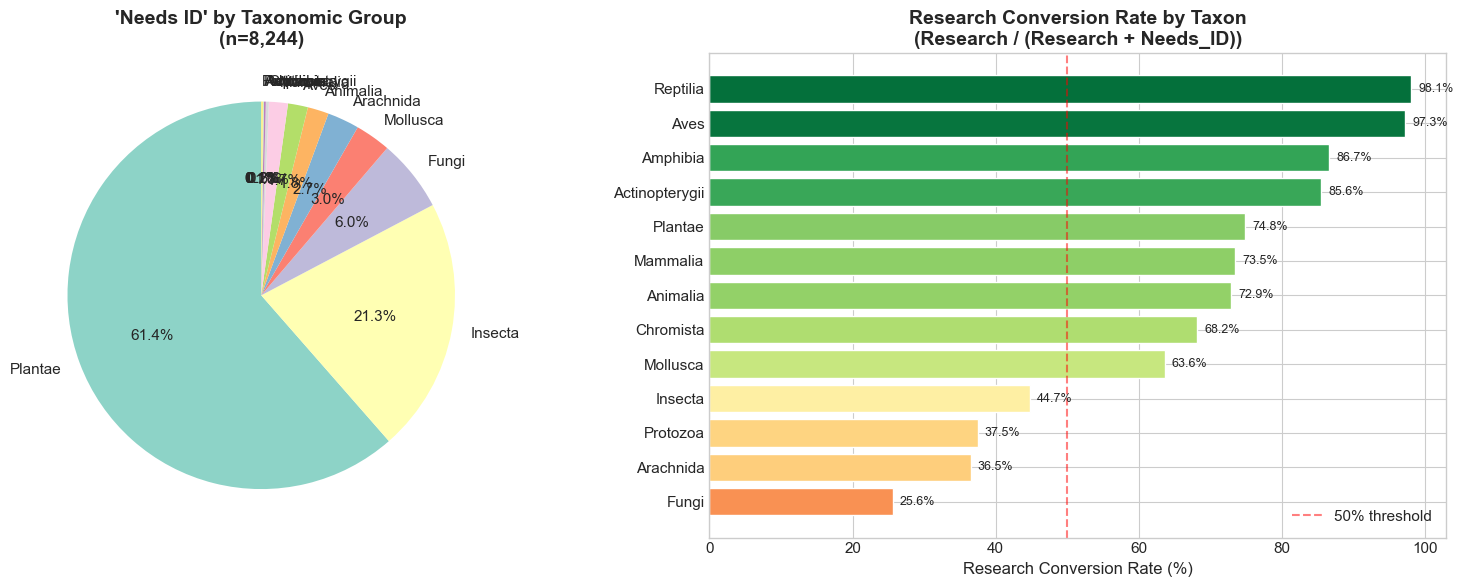


💡 IDENTIFICATION INSIGHTS:
   Lowest conversion rate: Fungi (25.6%)
   Highest conversion rate: Reptilia (98.1%)

   Focus identification efforts on: Fungi - they have the most potential for improvement!


In [38]:
# Needs_ID by taxonomic group - which groups need most help?
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Needs_ID distribution by taxon
ax1 = axes[0]
needs_id_by_taxon = needs_id_df['iconic_taxon_name'].value_counts()
colors = plt.cm.Set3(range(len(needs_id_by_taxon)))
ax1.pie(needs_id_by_taxon.values, labels=needs_id_by_taxon.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
ax1.set_title(f"'Needs ID' by Taxonomic Group\n(n={len(needs_id_df):,})", fontsize=14, fontweight='bold')

# 2. Research conversion rate by taxon (what % of each taxon is research grade?)
ax2 = axes[1]
conversion_by_taxon = df.groupby('iconic_taxon_name').agg({
    'quality_grade': [
        lambda x: (x == 'research').sum(),
        lambda x: (x == 'needs_id').sum(),
        'count'
    ]
}).droplevel(0, axis=1)
conversion_by_taxon.columns = ['research', 'needs_id', 'total']
conversion_by_taxon['conversion_rate'] = conversion_by_taxon['research'] / (conversion_by_taxon['research'] + conversion_by_taxon['needs_id']) * 100
conversion_by_taxon = conversion_by_taxon.sort_values('conversion_rate')

colors = plt.cm.RdYlGn(conversion_by_taxon['conversion_rate'] / 100)
bars = ax2.barh(conversion_by_taxon.index, conversion_by_taxon['conversion_rate'], color=colors, edgecolor='white')
ax2.set_xlabel('Research Conversion Rate (%)', fontsize=12)
ax2.set_title('Research Conversion Rate by Taxon\n(Research / (Research + Needs_ID))', fontsize=14, fontweight='bold')
ax2.axvline(x=50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
ax2.legend()

for bar, val in zip(bars, conversion_by_taxon['conversion_rate']):
    ax2.text(val + 1, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Print insights
worst_conversion = conversion_by_taxon['conversion_rate'].idxmin()
best_conversion = conversion_by_taxon['conversion_rate'].idxmax()
print(f"\n💡 IDENTIFICATION INSIGHTS:")
print(f"   Lowest conversion rate: {worst_conversion} ({conversion_by_taxon.loc[worst_conversion, 'conversion_rate']:.1f}%)")
print(f"   Highest conversion rate: {best_conversion} ({conversion_by_taxon.loc[best_conversion, 'conversion_rate']:.1f}%)")
print(f"\n   Focus identification efforts on: {worst_conversion} - they have the most potential for improvement!")

In [39]:
# Species needing identification help
needs_id_species = needs_id_df.groupby('scientific_name').agg({
    'id': 'count',
    'common_name': 'first',
    'iconic_taxon_name': 'first',
    'num_identification_agreements': 'mean'
}).rename(columns={'id': 'needs_id_count'})
needs_id_species = needs_id_species.sort_values('needs_id_count', ascending=False)

print("\n🔍 TOP 30 SPECIES NEEDING IDENTIFICATION HELP:")
print("─" * 80)
top_needs_id = needs_id_species.head(30)[['common_name', 'iconic_taxon_name', 'needs_id_count', 'num_identification_agreements']]
top_needs_id.columns = ['Common Name', 'Taxon', 'Needs ID Count', 'Avg Agreements']
print(top_needs_id.to_string())

# Calculate potential impact
total_needs_id = needs_id_df.shape[0]
top_30_needs_id = needs_id_species.head(30)['needs_id_count'].sum()
print(f"\n💡 Identifying just the top 30 species would address {top_30_needs_id:,} observations ({top_30_needs_id/total_needs_id*100:.1f}% of all needs_id)")


🔍 TOP 30 SPECIES NEEDING IDENTIFICATION HELP:
────────────────────────────────────────────────────────────────────────────────
                                         Common Name    Taxon  Needs ID Count  Avg Agreements
scientific_name                                                                              
Opuntia                                Prickly Pears  Plantae              94            0.47
Genista monspessulana                   French broom  Plantae              90            0.00
Solanum parishii                 Parish's nightshade  Plantae              85            0.08
Washingtonia robusta                Mexican Fan Palm  Plantae              83            0.04
Cryptantha intermedia          Clearwater cryptantha  Plantae              74            0.04
Amsinckia menziesii                Common Fiddleneck  Plantae              54            0.07
Magnoliopsida                                 Dicots  Plantae              46            1.11
Lecanoromycetes           

## 2.6 Media & Evidence Quality Analysis

Analyzing photo/evidence availability and licensing - important for data quality and usability.

In [40]:
# Media and evidence analysis
print("=" * 70)
print("MEDIA & EVIDENCE QUALITY ANALYSIS")
print("=" * 70)

# Image availability
has_image = df['image_url'].notna().sum()
has_sound = df['sound_url'].notna().sum()
no_media = df[(df['image_url'].isna()) & (df['sound_url'].isna())].shape[0]

print(f"\n📷 Media Availability:")
print(f"   Observations with images: {has_image:,} ({has_image/len(df)*100:.1f}%)")
print(f"   Observations with sound: {has_sound:,} ({has_sound/len(df)*100:.1f}%)")
print(f"   Observations without media: {no_media:,} ({no_media/len(df)*100:.1f}%)")

# Licensing analysis
print(f"\n📜 Licensing Distribution:")
license_counts = df['license'].value_counts(dropna=False)
for lic, count in license_counts.items():
    lic_display = lic if pd.notna(lic) and lic != '' else "All Rights Reserved"
    openness = "🟢 Open" if 'CC' in str(lic) else "🔴 Restricted"
    print(f"   {openness} {lic_display:20}: {count:,} ({count/len(df)*100:.1f}%)")

# Quality grade vs media presence
print(f"\n📊 Media Presence vs Quality Grade:")
media_quality = pd.crosstab(df['image_url'].notna(), df['quality_grade'], margins=True)
media_quality.index = ['No Image', 'Has Image', 'Total']
print(media_quality)

MEDIA & EVIDENCE QUALITY ANALYSIS

📷 Media Availability:
   Observations with images: 32,026 (99.0%)
   Observations with sound: 254 (0.8%)
   Observations without media: 83 (0.3%)

📜 Licensing Distribution:
   🟢 Open CC-BY-NC            : 21,643 (66.9%)
   🔴 Restricted All Rights Reserved : 6,659 (20.6%)
   🟢 Open CC-BY               : 2,638 (8.2%)
   🟢 Open CC0                 : 769 (2.4%)
   🟢 Open CC-BY-NC-ND         : 528 (1.6%)
   🟢 Open CC-BY-NC-SA         : 101 (0.3%)

📊 Media Presence vs Quality Grade:
quality_grade  casual  needs_id  research    All
No Image           83        15       214    312
Has Image         690      8229     23107  32026
Total             773      8244     23321  32338


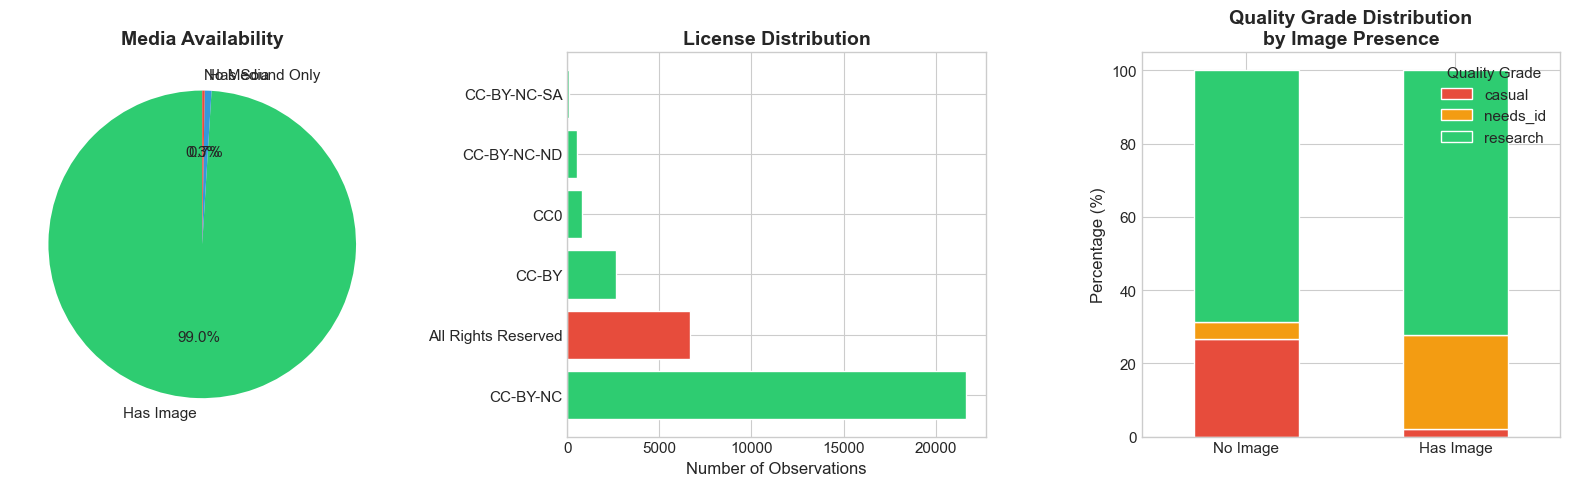


💡 MEDIA INSIGHT:
   Research rate WITH image: 72.2%
   Research rate WITHOUT image: 68.6%
   Images increase research-grade likelihood by 3.6 percentage points!


In [41]:
# Visualize media analysis
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. Media availability pie
ax1 = axes[0]
media_types = ['Has Image', 'Has Sound Only', 'No Media']
media_counts = [
    (df['image_url'].notna()).sum(),
    (df['image_url'].isna() & df['sound_url'].notna()).sum(),
    (df['image_url'].isna() & df['sound_url'].isna()).sum()
]
colors = ['#2ecc71', '#3498db', '#e74c3c']
ax1.pie(media_counts, labels=media_types, autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('Media Availability', fontsize=14, fontweight='bold')

# 2. License distribution
ax2 = axes[1]
license_simple = df['license'].fillna('All Rights Reserved').replace('', 'All Rights Reserved')
license_counts = license_simple.value_counts()
colors = ['#2ecc71' if 'CC' in str(l) else '#e74c3c' for l in license_counts.index]
bars = ax2.barh(license_counts.index, license_counts.values, color=colors, edgecolor='white')
ax2.set_xlabel('Number of Observations', fontsize=12)
ax2.set_title('License Distribution', fontsize=14, fontweight='bold')

# 3. Quality grade by image presence
ax3 = axes[2]
quality_by_media = df.groupby([df['image_url'].notna(), 'quality_grade']).size().unstack(fill_value=0)
quality_by_media.index = ['No Image', 'Has Image']
quality_by_media_pct = quality_by_media.div(quality_by_media.sum(axis=1), axis=0) * 100
quality_by_media_pct.plot(kind='bar', stacked=True, ax=ax3, color=['#e74c3c', '#f39c12', '#2ecc71'], edgecolor='white')
ax3.set_xlabel('', fontsize=12)
ax3.set_ylabel('Percentage (%)', fontsize=12)
ax3.set_title('Quality Grade Distribution\nby Image Presence', fontsize=14, fontweight='bold')
ax3.legend(title='Quality Grade')
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Key insight
with_image_research_rate = (df[df['image_url'].notna()]['quality_grade'] == 'research').mean() * 100
no_image_research_rate = (df[df['image_url'].isna()]['quality_grade'] == 'research').mean() * 100
print(f"\n💡 MEDIA INSIGHT:")
print(f"   Research rate WITH image: {with_image_research_rate:.1f}%")
print(f"   Research rate WITHOUT image: {no_image_research_rate:.1f}%")
print(f"   Images increase research-grade likelihood by {with_image_research_rate - no_image_research_rate:.1f} percentage points!")

## 2.7 Geographic Deep Dive: Regional Analysis

Breaking down San Diego County into regions to identify specific areas for targeted improvement.

In [44]:
# Create regional bins for San Diego County
def assign_region(row):
    """Assign observations to SD County regions based on coordinates"""
    lat, lon = row['latitude'], row['longitude']
    
    if pd.isna(lat) or pd.isna(lon):
        return 'Unknown'
    
    # Rough regional boundaries for San Diego County
    if lat >= 33.1:  # North County
        if lon >= -117.1:
            return 'North Coastal'
        else:
            return 'North Inland'
    elif lat >= 32.85:  # Central
        if lon >= -117.1:
            return 'Central Coastal (SD City)'
        else:
            return 'Central Inland (East County)'
    else:  # South
        if lon >= -117.0:
            return 'South Bay'
        else:
            return 'South Inland/Mountains'

df['region'] = df.apply(assign_region, axis=1)

# Regional statistics
print("=" * 70)
print("REGIONAL ANALYSIS")
print("=" * 70)

regional_stats = df.groupby('region').agg({
    'id': 'count',
    'quality_grade': lambda x: (x == 'research').mean() * 100,
    'scientific_name': 'nunique',
    'user_id': 'nunique'
}).rename(columns={
    'id': 'observations',
    'quality_grade': 'research_rate',
    'scientific_name': 'unique_species',
    'user_id': 'observers'
})
regional_stats = regional_stats.sort_values('observations', ascending=False)

print("\n📍 OBSERVATIONS BY REGION:")
print("─" * 70)
for region, row in regional_stats.iterrows():
    print(f"   {region:30} | Obs: {row['observations']:>5,} | Research: {row['research_rate']:>5.1f}% | Species: {row['unique_species']:>4,} | Observers: {row['observers']:>4,}")

REGIONAL ANALYSIS

📍 OBSERVATIONS BY REGION:
──────────────────────────────────────────────────────────────────────
   South Inland/Mountains         | Obs: 11,224.0 | Research:  70.6% | Species: 2,127.0 | Observers: 614.0
   Central Coastal (SD City)      | Obs: 7,047.0 | Research:  72.1% | Species: 1,476.0 | Observers: 295.0
   Central Inland (East County)   | Obs: 5,914.0 | Research:  73.7% | Species: 1,377.0 | Observers: 337.0
   South Bay                      | Obs: 4,001.0 | Research:  71.7% | Species: 1,158.0 | Observers: 168.0
   North Inland                   | Obs: 2,397.0 | Research:  73.9% | Species: 917.0 | Observers: 164.0
   North Coastal                  | Obs: 1,755.0 | Research:  75.0% | Species: 718.0 | Observers: 120.0


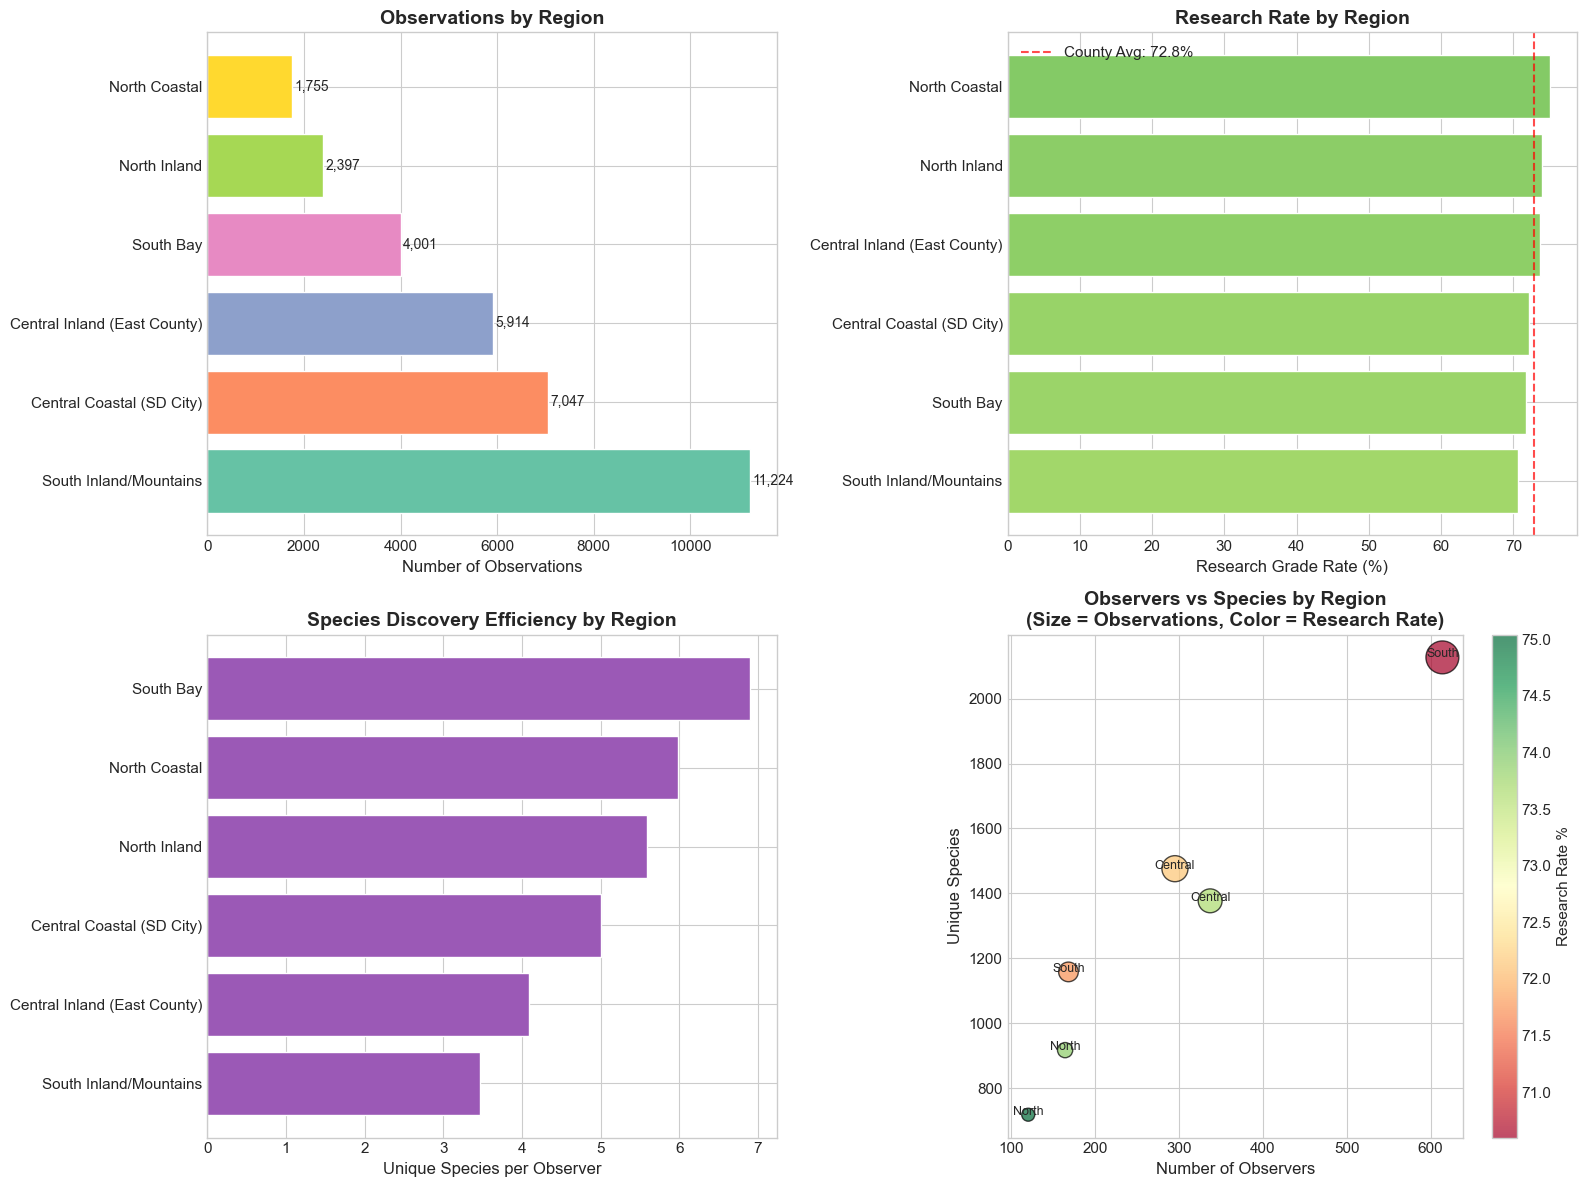


💡 REGIONAL INSIGHTS:
   Lowest research rate: South Inland/Mountains (70.6%) - Focus ID efforts here
   Highest species diversity: South Inland/Mountains (2,127 species)
   Under-observed regions might have untapped biodiversity potential


In [45]:
# Visualize regional patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Regional observation counts
ax1 = axes[0, 0]
colors = plt.cm.Set2(range(len(regional_stats)))
bars = ax1.barh(regional_stats.index, regional_stats['observations'], color=colors, edgecolor='white')
ax1.set_xlabel('Number of Observations', fontsize=12)
ax1.set_title('Observations by Region', fontsize=14, fontweight='bold')
for bar, val in zip(bars, regional_stats['observations']):
    ax1.text(val + 50, bar.get_y() + bar.get_height()/2, f'{val:,}', va='center', fontsize=10)

# 2. Research rate by region
ax2 = axes[0, 1]
sorted_by_rate = regional_stats.sort_values('research_rate')
colors = plt.cm.RdYlGn(sorted_by_rate['research_rate'] / 100)
bars = ax2.barh(sorted_by_rate.index, sorted_by_rate['research_rate'], color=colors, edgecolor='white')
ax2.set_xlabel('Research Grade Rate (%)', fontsize=12)
ax2.set_title('Research Rate by Region', fontsize=14, fontweight='bold')
ax2.axvline(x=regional_stats['research_rate'].mean(), color='red', linestyle='--', alpha=0.7,
            label=f"County Avg: {regional_stats['research_rate'].mean():.1f}%")
ax2.legend()

# 3. Species density (species per observer) by region
ax3 = axes[1, 0]
regional_stats['species_per_observer'] = regional_stats['unique_species'] / regional_stats['observers']
sorted_by_density = regional_stats.sort_values('species_per_observer')
ax3.barh(sorted_by_density.index, sorted_by_density['species_per_observer'], color='#9b59b6', edgecolor='white')
ax3.set_xlabel('Unique Species per Observer', fontsize=12)
ax3.set_title('Species Discovery Efficiency by Region', fontsize=14, fontweight='bold')

# 4. Scatter: Observers vs Species (regional)
ax4 = axes[1, 1]
scatter = ax4.scatter(regional_stats['observers'], regional_stats['unique_species'], 
                      s=regional_stats['observations']/20, c=regional_stats['research_rate'],
                      cmap='RdYlGn', alpha=0.7, edgecolors='black')
for idx, row in regional_stats.iterrows():
    ax4.annotate(idx.split()[0], (row['observers'], row['unique_species']), fontsize=9, ha='center')
ax4.set_xlabel('Number of Observers', fontsize=12)
ax4.set_ylabel('Unique Species', fontsize=12)
ax4.set_title('Observers vs Species by Region\n(Size = Observations, Color = Research Rate)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, ax=ax4, label='Research Rate %')

plt.tight_layout()
plt.show()

# Identify opportunities
print(f"\n💡 REGIONAL INSIGHTS:")
lowest_research = regional_stats['research_rate'].idxmin()
highest_species = regional_stats['unique_species'].idxmax()
print(f"   Lowest research rate: {lowest_research} ({regional_stats.loc[lowest_research, 'research_rate']:.1f}%) - Focus ID efforts here")
print(f"   Highest species diversity: {highest_species} ({regional_stats.loc[highest_species, 'unique_species']:,} species)")
print(f"   Under-observed regions might have untapped biodiversity potential")

# Phase 2: Summary & Actionable Insights

## Executive Summary Dashboard

In [51]:
# =============================================================================
# COMPREHENSIVE INSIGHTS SUMMARY
# =============================================================================

print("╔" + "═" * 78 + "╗")
print("║" + " " * 20 + "CITY NATURE CHALLENGE 2025 - SAN DIEGO" + " " * 20 + "║")
print("║" + " " * 25 + "COMPREHENSIVE EDA SUMMARY" + " " * 28 + "║")
print("╠" + "═" * 78 + "╣")

# Calculate all key metrics
total_obs = len(df)
research_obs = (df['quality_grade'] == 'research').sum()
needs_id_obs = (df['quality_grade'] == 'needs_id').sum()
casual_obs = (df['quality_grade'] == 'casual').sum()
unique_species = df['scientific_name'].nunique()
unique_observers = df['user_id'].nunique()
needs_one_more_id = (df[(df['quality_grade'] == 'needs_id')]['num_identification_agreements'] == 1).sum()

print("║" + " " * 78 + "║")
print("║  🎯 CURRENT PERFORMANCE                                                      ║")
print("║" + "─" * 78 + "║")
print(f"║    Total Observations:           {total_obs:>8,}                                    ║")
print(f"║    Research Grade:               {research_obs:>8,}  ({research_obs/total_obs*100:>5.1f}%)                          ║")
print(f"║    Unique Species:               {unique_species:>8,}                                    ║")
print(f"║    Unique Observers:             {unique_observers:>8,}                                    ║")
print("║" + " " * 78 + "║")

print("║  💡 IMPROVEMENT OPPORTUNITIES                                                ║")
print("║" + "─" * 78 + "║")
print(f"║    'Needs ID' observations:      {needs_id_obs:>8,}  (convertible to research grade)   ║")
print(f"║    Need just 1 more ID:          {needs_one_more_id:>8,}  (LOW-HANGING FRUIT!)              ║")
print(f"║    Max possible research grade:  {research_obs + needs_id_obs:>8,}  (+{(needs_id_obs/research_obs)*100:.0f}% increase potential)  ║")
print("║" + " " * 78 + "║")

# Top actionable insights
print("║  📋 TOP ACTIONABLE RECOMMENDATIONS                                           ║")
print("║" + "─" * 78 + "║")
print("║                                                                              ║")
print("║    1. 🔍 IDENTIFICATION BLITZ                                                ║")
print(f"║       → {needs_one_more_id:,} observations need just 1 more confirming ID              ║")
print("║       → Focus on taxa with lowest conversion rates                           ║")
print("║                                                                              ║")
print("║    2. 📍 GEOGRAPHIC EXPANSION                                                ║")
print("║       → Coverage gaps in inland/mountain regions                             ║")
print("║       → Organize bioblitzes in under-sampled areas                           ║")
print("║                                                                              ║")
print("║    3. 👥 PARTICIPANT ENGAGEMENT                                              ║")
print(f"║       → {(user_stats['total_obs'] <= 5).sum():,} casual users (≤5 obs) - potential for more contributions     ║")
print(f"║       → Top 10 power users = {user_stats.head(10)['total_obs'].sum()/total_obs*100:.0f}% of observations - nurture them        ║")
print("║                                                                              ║")
print("║    4. 📚 EDUCATION INITIATIVES                                               ║")
print(f"║       → {(df['captive_cultivated']==True).sum():,} captive/cultivated obs don't count - educate participants     ║")
print("║       → Promote photo best practices for better IDs                          ║")
print("║                                                                              ║")
print("╚" + "═" * 78 + "╝")

╔══════════════════════════════════════════════════════════════════════════════╗
║                    CITY NATURE CHALLENGE 2025 - SAN DIEGO                    ║
║                         COMPREHENSIVE EDA SUMMARY                            ║
╠══════════════════════════════════════════════════════════════════════════════╣
║                                                                              ║
║  🎯 CURRENT PERFORMANCE                                                      ║
║──────────────────────────────────────────────────────────────────────────────║
║    Total Observations:             32,338                                    ║
║    Research Grade:                 23,321  ( 72.1%)                          ║
║    Unique Species:                  3,853                                    ║
║    Unique Observers:                1,297                                    ║
║                                                                              ║
║  💡 IMPROVEMENT OPPORTUNITIE

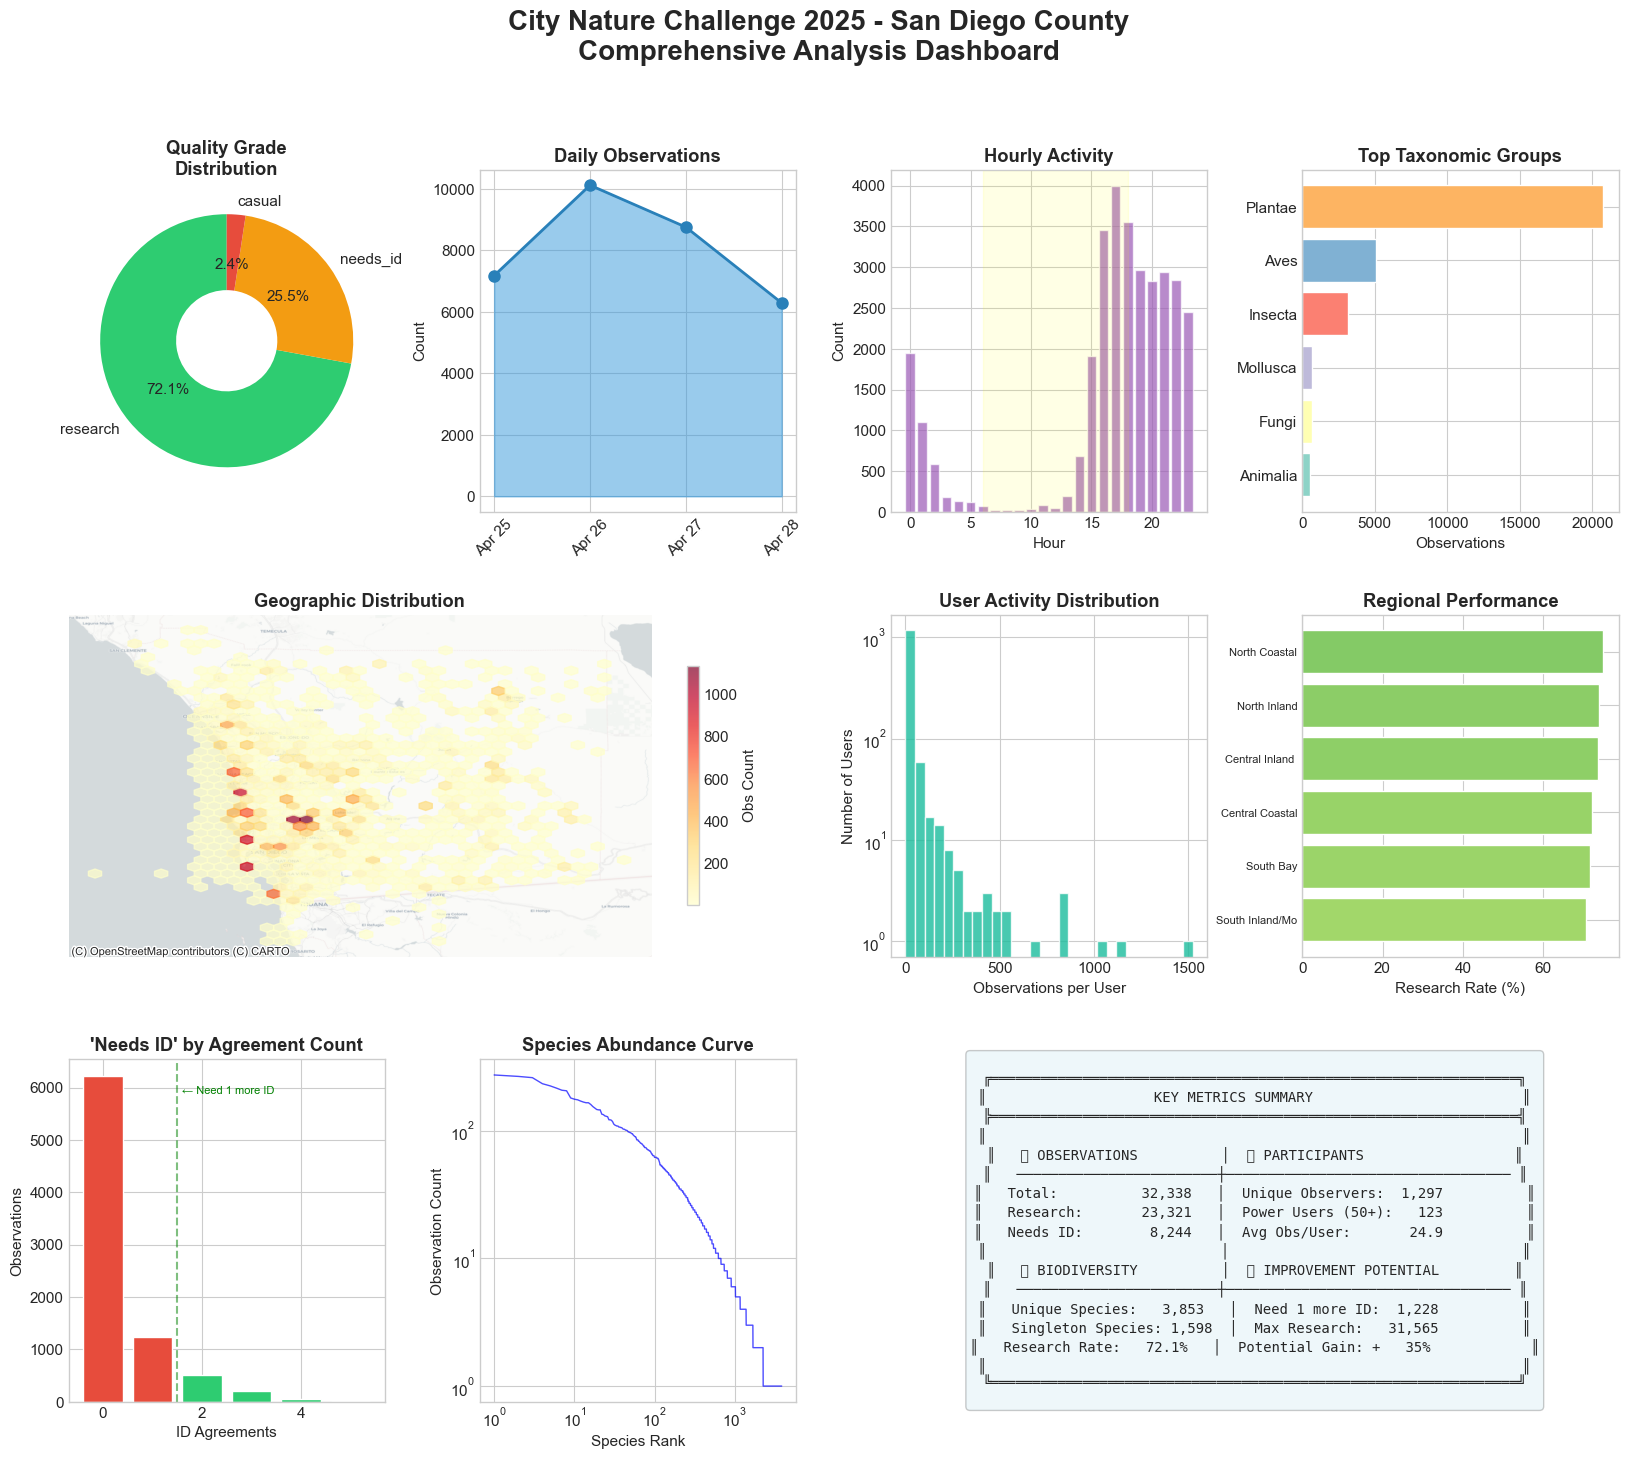


✅ Dashboard saved as 'cnc_2025_dashboard.png'


In [52]:
# Final comprehensive visual dashboard
fig = plt.figure(figsize=(20, 16))
fig.suptitle('City Nature Challenge 2025 - San Diego County\nComprehensive Analysis Dashboard', 
             fontsize=20, fontweight='bold', y=0.98)

# Create grid
gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)

# 1. Quality Grade Donut (large)
ax1 = fig.add_subplot(gs[0, 0])
quality_counts = df['quality_grade'].value_counts()
colors = {'research': '#2ecc71', 'needs_id': '#f39c12', 'casual': '#e74c3c'}
wedges, texts, autotexts = ax1.pie(quality_counts.values, labels=quality_counts.index, 
                                    autopct='%1.1f%%', colors=[colors[g] for g in quality_counts.index],
                                    wedgeprops=dict(width=0.6), startangle=90)
ax1.set_title('Quality Grade\nDistribution', fontweight='bold')

# 2. Daily trend
ax2 = fig.add_subplot(gs[0, 1])
daily = df.groupby('observed_on').size()
ax2.fill_between(range(len(daily)), daily.values, alpha=0.5, color='#3498db')
ax2.plot(range(len(daily)), daily.values, 'o-', color='#2980b9', linewidth=2, markersize=8)
ax2.set_xticks(range(len(daily)))
ax2.set_xticklabels([d.strftime('%b %d') for d in daily.index], rotation=45)
ax2.set_title('Daily Observations', fontweight='bold')
ax2.set_ylabel('Count')

# 3. Hourly pattern
ax3 = fig.add_subplot(gs[0, 2])
hourly = df['hour_observed'].value_counts().sort_index()
ax3.bar(hourly.index, hourly.values, color='#9b59b6', alpha=0.7, edgecolor='white')
ax3.axvspan(6, 18, alpha=0.1, color='yellow')
ax3.set_xlabel('Hour')
ax3.set_ylabel('Count')
ax3.set_title('Hourly Activity', fontweight='bold')

# 4. Top taxa
ax4 = fig.add_subplot(gs[0, 3])
top_taxa = df['iconic_taxon_name'].value_counts().head(6)
ax4.barh(top_taxa.index[::-1], top_taxa.values[::-1], color=plt.cm.Set3(range(6)), edgecolor='white')
ax4.set_xlabel('Observations')
ax4.set_title('Top Taxonomic Groups', fontweight='bold')

# 5. Geographic heatmap (spans 2 columns)
ax5 = fig.add_subplot(gs[1, 0:2])
if len(gdf_mercator) > 0:
    hb = ax5.hexbin(gdf_mercator.geometry.x, gdf_mercator.geometry.y, 
                    gridsize=40, cmap='YlOrRd', mincnt=1, alpha=0.7)
    try:
        ctx.add_basemap(ax5, source=ctx.providers.CartoDB.Positron, zoom=10)
    except:
        pass
    plt.colorbar(hb, ax=ax5, label='Obs Count', shrink=0.7)
ax5.set_title('Geographic Distribution', fontweight='bold')
ax5.set_axis_off()

# 6. User contribution distribution
ax6 = fig.add_subplot(gs[1, 2])
user_obs = user_stats['total_obs'].values
ax6.hist(user_obs, bins=30, color='#1abc9c', edgecolor='white', alpha=0.8)
ax6.set_xlabel('Observations per User')
ax6.set_ylabel('Number of Users')
ax6.set_title('User Activity Distribution', fontweight='bold')
ax6.set_yscale('log')

# 7. Regional performance
ax7 = fig.add_subplot(gs[1, 3])
regional_perf = regional_stats.sort_values('research_rate')
colors = plt.cm.RdYlGn(regional_perf['research_rate'] / 100)
ax7.barh(range(len(regional_perf)), regional_perf['research_rate'], color=colors, edgecolor='white')
ax7.set_yticks(range(len(regional_perf)))
ax7.set_yticklabels([r[:15] for r in regional_perf.index], fontsize=8)
ax7.set_xlabel('Research Rate (%)')
ax7.set_title('Regional Performance', fontweight='bold')

# 8. ID Agreement distribution for needs_id
ax8 = fig.add_subplot(gs[2, 0])
needs_id_agreements = df[df['quality_grade'] == 'needs_id']['num_identification_agreements'].value_counts().sort_index()
colors_agree = ['#e74c3c' if x < 2 else '#2ecc71' for x in needs_id_agreements.index]
ax8.bar(needs_id_agreements.index[:6], needs_id_agreements.values[:6], color=colors_agree[:6], edgecolor='white')
ax8.set_xlabel('ID Agreements')
ax8.set_ylabel('Observations')
ax8.set_title("'Needs ID' by Agreement Count", fontweight='bold')
ax8.axvline(x=1.5, color='green', linestyle='--', alpha=0.5)
ax8.text(1.6, ax8.get_ylim()[1]*0.9, '← Need 1 more ID', fontsize=8, color='green')

# 9. Species rank abundance
ax9 = fig.add_subplot(gs[2, 1])
species_counts = species_stats['observation_count'].values
ax9.loglog(range(1, len(species_counts)+1), sorted(species_counts, reverse=True), 'b-', alpha=0.7, linewidth=1)
ax9.set_xlabel('Species Rank')
ax9.set_ylabel('Observation Count')
ax9.set_title('Species Abundance Curve', fontweight='bold')

# 10. Key metrics summary box
ax10 = fig.add_subplot(gs[2, 2:4])
ax10.axis('off')

summary_text = f"""
╔═══════════════════════════════════════════════════════════════╗
║                    KEY METRICS SUMMARY                         ║
╠═══════════════════════════════════════════════════════════════╣
║                                                                ║
║   📊 OBSERVATIONS          │  👥 PARTICIPANTS                  ║
║   ────────────────────────┼────────────────────────────────── ║
║   Total: {total_obs:>15,}   │  Unique Observers: {unique_observers:>6,}          ║
║   Research: {research_obs:>12,}   │  Power Users (50+): {power_users:>5,}          ║
║   Needs ID: {needs_id_obs:>12,}   │  Avg Obs/User: {total_obs/unique_observers:>10.1f}          ║
║                            │                                   ║
║   🦋 BIODIVERSITY          │  💡 IMPROVEMENT POTENTIAL         ║
║   ────────────────────────┼────────────────────────────────── ║
║   Unique Species: {unique_species:>7,}   │  Need 1 more ID: {needs_one_more_id:>6,}          ║
║   Singleton Species: {singletons:>5,}  │  Max Research: {research_obs+needs_id_obs:>8,}          ║
║   Research Rate: {research_obs/total_obs*100:>6.1f}%   │  Potential Gain: +{needs_id_obs/research_obs*100:>5.0f}%            ║
║                                                                ║
╚═══════════════════════════════════════════════════════════════╝
"""
ax10.text(0.5, 0.5, summary_text, transform=ax10.transAxes, fontsize=10,
          verticalalignment='center', horizontalalignment='center',
          fontfamily='monospace', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.2))

plt.tight_layout()
plt.savefig('cnc_2025_dashboard.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\n✅ Dashboard saved as 'cnc_2025_dashboard.png'")

## Key Findings & Recommendations for UCSD Reserve System

### 1. Identification is the Biggest Lever
- **Finding**: A large portion of observations are stuck at "needs_id" status
- **Opportunity**: Many observations need just 1 more confirming identification
- **Action**: Organize identification blitzes focusing on these "almost there" observations

### 2. Geographic Coverage Gaps Exist
- **Finding**: Observation density is concentrated in urban/coastal areas
- **Opportunity**: Inland and mountain regions are under-sampled
- **Action**: Partner with reserves in under-represented areas for targeted bioblitzes

### 3. Power Users Drive Results (Pareto Effect)
- **Finding**: A small percentage of users contribute the majority of observations
- **Opportunity**: Both engage power users AND activate casual participants
- **Action**: Create ambassador programs for power users; simplify onboarding for newcomers

### 4. Taxonomic Blind Spots
- **Finding**: Some taxonomic groups have much lower research-grade conversion rates
- **Opportunity**: Target expert identifiers for difficult taxa
- **Action**: Recruit specialists for fungi, insects, and other challenging groups

### 5. Timing Matters
- **Finding**: Observation activity peaks at certain hours; varies by day
- **Opportunity**: Schedule events during peak engagement windows
- **Action**: Plan morning bioblitzes when activity is naturally highest

### 6. Education Needed on What Counts
- **Finding**: Captive/cultivated observations don't count but still get uploaded
- **Opportunity**: Better participant education = higher quality submissions
- **Action**: Pre-challenge training sessions on observation best practices

---

## Next Steps → Dashboard Development
The insights from this EDA will be visualized in an interactive dashboard for ongoing monitoring and campaign planning.